Author: Andres Felipe Alba Hernandez
Applied AI Engineer <br>
March 2020 <br>
email: v-analba@microsoft.com <br>
https://www.linkedin.com/in/ahandresf/

# Evaluate prediction using the trained model

Remember that any model used here should have been already trained. This models can be created as objects of the class ModelPredictor.

In [1]:
#Importing the class for the different data-driven models
#Note: You should train the model before using them here. 
from predictor import ModelPredictor

Using TensorFlow backend.


In [2]:
#importing parameters used during training
from conf_params_datadriven import STATE_SPACE_DIM, ACTION_SPACE_DIM, MARKOVIAN_ORDER, POLYNOMIAL_DEGREE, DROPOUT_RATE

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams['figure.dpi'] = 300
import pickle

## Functions

### Accuracy Functions

In [4]:
def get_stats(accuracy, show_stats=True):
    maximum = accuracy.max()
    minimum = accuracy.min()
    mean = accuracy.mean()
    std = accuracy.std()
    if show_stats:
        print("/nGeneral Stadistics\n")
        print(('max accuracy:%s\nmin accuracy:%s\naverage accuracy:%s\nstandard desviation:%s\n')%(maximum,minimum,mean,std))
    return (maximum,minimum,mean,std)

In [5]:
def plot_accuracy_bars(features_names,accuracy,store_plot=False):
    minimum=accuracy.min()
    plt.xlabel('Accuracy')
    plt.ylabel('Features')
    plt.xlim(minimum-0.1, 1)
    plt.tick_params(labelsize=6)
    plt.barh(features_names,accuracy)
    plt.show()

In [6]:
def show_accuracy(accuracy_filename):
    res=np.load(accuracy_filename)
    maximum,minimum,mean,std = get_stats(res)
    plot_accuracy_bars(features_names=state_names,accuracy=res)

### Plot Traces

In [7]:
def plot_results(estimate_trace,real_trace,title="Non title provided"):
    plt.plot(estimate_trace,label='Predictive trace')
    plt.plot(real_trace,label='Real trace',linewidth=0.3)
    #plt.plot(real_trace,'*',label='Real trace')
    plt.title(title)
    plt.legend()
    plt.show()

In [8]:
def plot_several_traces(estimate_trace,real_trace):
    for column in range(30):
        state=state_names[column]
        plot_title=('Estimation vs Real for state: %s'%state)
        plot_results(estimate_trace=diff_state_estimation[:,column],real_trace=diff_out[:,column],title=plot_title)

In [9]:
def plot_all_traces(predictor_trace, real_trace, title):
    for column in range(30):
        subtitle=title+' column:'+str(column)
        plot_results(estimate_trace=predictor_trace[:,column],real_trace=real_trace[:,column],title=subtitle)

### Loading states and action names

This are numpy arrays (more like list) that contain the names of each possible action and state, this will be use to iterate over columns in a dataframe that contain all the data

In [10]:
#Asuming the states_names and action names where store in env_data directory
state_names = np.load('./env_data/state_names.npy', allow_pickle=True)
action_names = np.load('./env_data/action_names.npy', allow_pickle=True)

# Loading data 

The historical data can be store in csv file, for this we use the data_parser notebook, located at: https://github.com/ahandresf/pttgc/blob/master/data_parser.ipynb We load the csv file into a pandas dataframe.

If you want to use a different dataset you just need to change the data_dir variable below

In [11]:
#GCG2 Neuronal Networks April 21 DataSet
INPUT_DATASET = './data_parser_output/April_21_091929/x_set_diff_s_10.pickle'
OUTPUT_DATASET = './data_parser_output/April_21_091929/y_set_diff_s_10.pickle'

with open(INPUT_DATASET, 'rb') as f:
    input_training = pickle.load(f)
    print("I load x_set from:",INPUT_DATASET)
with open(OUTPUT_DATASET, 'rb') as f:
    output_training = pickle.load(f)
    print("I load y_set FROM ,"OUTPUT_DATASET)

I load x_set
I load y_set


In [12]:
num_actions=len(action_names)
print(num_actions)
num_states=len(state_names)
print(num_states)

8
30


In [13]:
#Unpack actions and states
#x_set_total = np.concatenate((actions_input,states_input),axis=1)
actions_input=input_training[:,0:num_actions]
states_input=input_training[:,num_actions::]

In [14]:
print(actions_input.shape)
print(states_input.shape)

(494614, 8)
(494614, 30)


In [15]:
a=actions_input[0,:]
s=states_input[0,:]

# Create Model Predictors

We just create the objects per each kind of predictor that we would like to use. <br>
Remember that a predictor function $P(s,a)$ is use in one of the two ways below: <br>
- $\hat{s}_{n+1}=P(s_{n},a_{n})$
- $\hat{d}_{n}=P(s_{n},a_{n})$ where $d=s_{n+1}-s_{n}$

Create each predictor object with the desire modeltype and parameters, most of the parameters can be imported from config_params_datadriven or they can be manually modify while calling the constructor.

In [16]:
'''
The model stamp indicate where the model is located. Format below.
./models/'+model_stamp.
If you want to check in the default location use None instead.
'''
#Model location indicator (stamp)
model_stamp_nn = 'April_22_135213_nn_diff_shift_10'

In [17]:
# Neuronal Networks
print("neuronal networks")
nn_predictor=ModelPredictor(modeltype='nn', noise_percentage=0, action_space_dim=ACTION_SPACE_DIM,
                          state_space_dim=STATE_SPACE_DIM,model_stamp=model_stamp_nn)

neuronal networks
nn  is used as the data driven model to train brain.








### Test models
**You may want to test the objects with a single (s,a) input to be sure it works.** <br>
Comment the cell for the unused or untrained models.


In [18]:
nn_predictor.predict(s,a)

array([ 6.6828407e+01,  4.1851933e+01,  1.1415744e+00,  2.0234013e-02,
        8.7578995e+01, -8.3134246e-01, -5.7826591e+00,  7.7158391e-01,
       -3.0578271e-01, -3.7622134e+02, -3.8226444e-01, -1.9381410e-01,
       -2.3304081e-01, -3.5776940e-01,  3.4449866e+00,  7.6983609e+00,
        7.4587507e+00, -1.7290510e+01,  1.8332016e+00, -1.1832734e+00,
        1.5447902e+02, -8.2335901e+02,  5.9803414e+00, -8.0008993e+00,
        3.2463873e+02, -3.0113900e+00, -3.3244938e-01,  9.6692829e+00,
       -3.0105364e-01, -1.6356727e+00], dtype=float32)

In [19]:
#gb_predictor.predict(s,a)

In [20]:
#lstm_predictor.predict(s,a)

In [21]:
#poly_predictor(s,a)

# Get traces

In [22]:
def get_predict_step_trace(predictor,states_input,actions_trace):
    #predictor=nn_predictor
    input_s = states_input[0,:]
    diff_state_estimation=[]
    for observation in range(0,len(actions_trace)):
        input_s = states_input[observation,:] #get input from dataset
        diff_state = predictor.predict(input_s,actions_trace[observation,:]) #estimate diff or state
        diff_state_estimation.append(diff_state) #add result to the trace
    diff_state_estimation=np.array(diff_state_estimation) #convert list into numpy array
    print('diff_state_estimation shape: %s',diff_state_estimation.shape)
    return(diff_state_estimation)

In [23]:
#Inputs
output_estimation=get_predict_step_trace(predictor=nn_predictor,
                                         states_input=states_input, 
                                         actions_trace=actions_input)

diff_state_estimation shape: %s (494614, 30)


In [24]:
output_training.shape

(494614, 30)

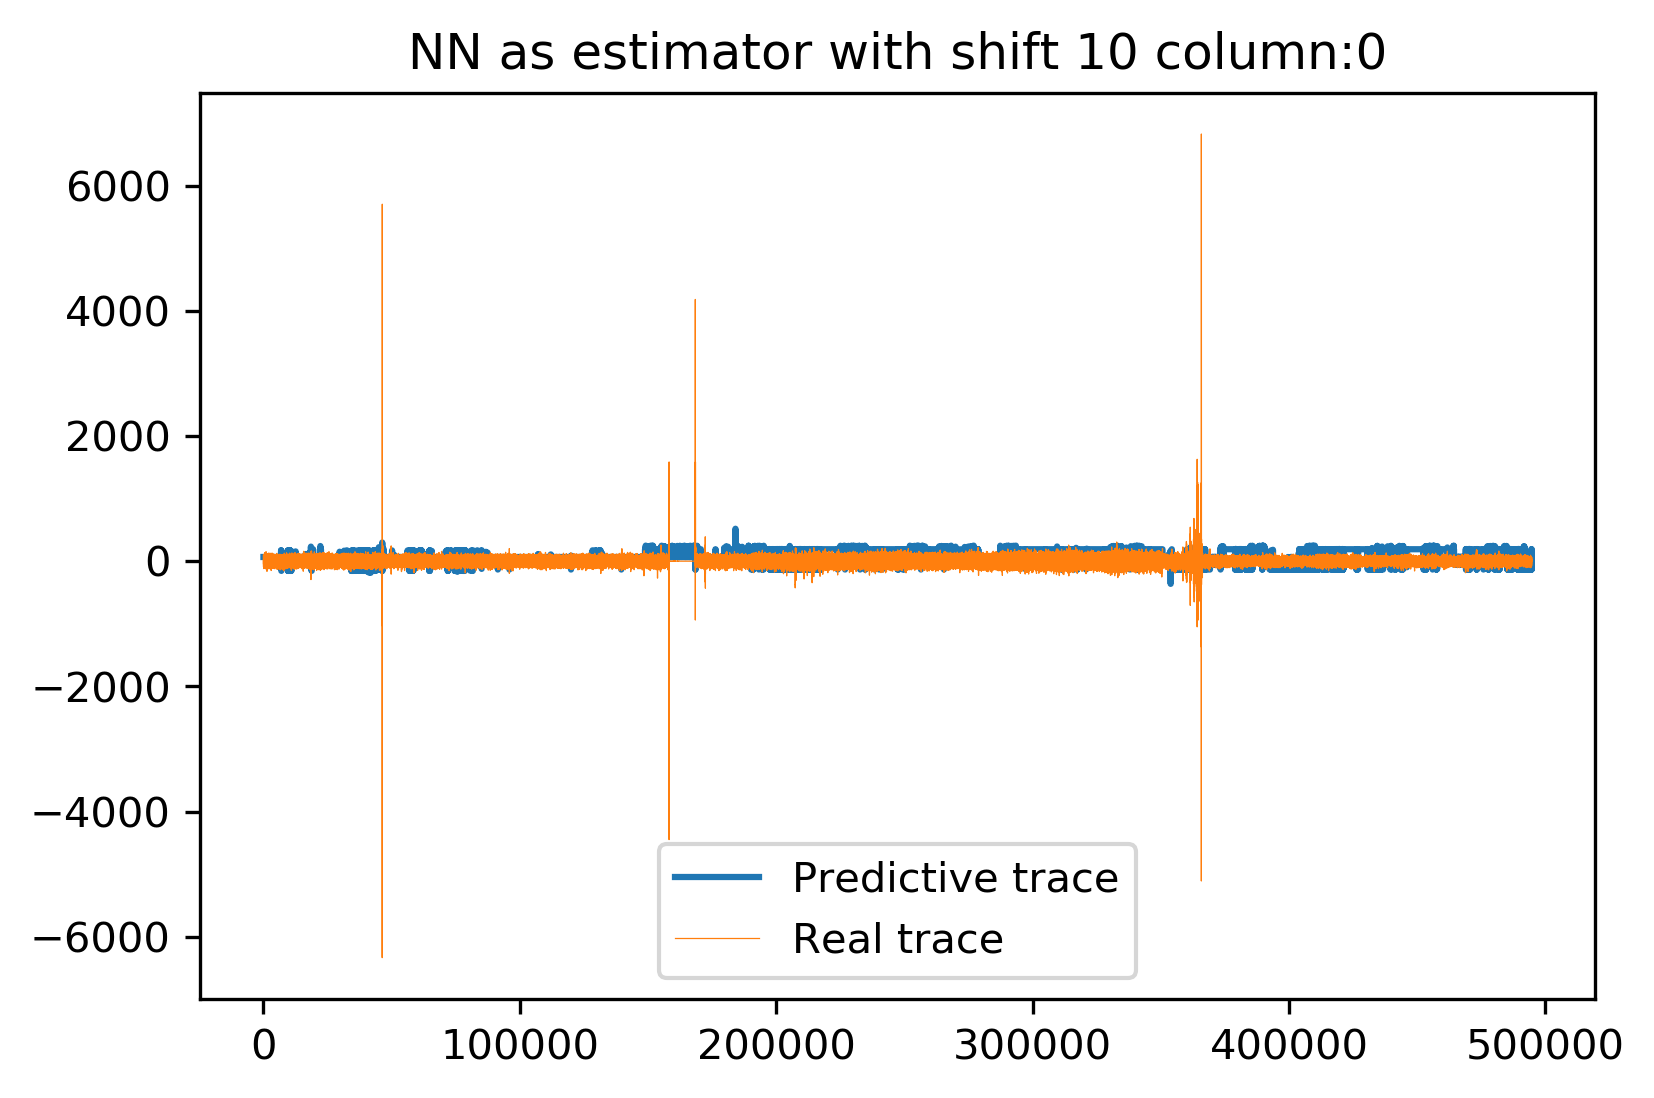

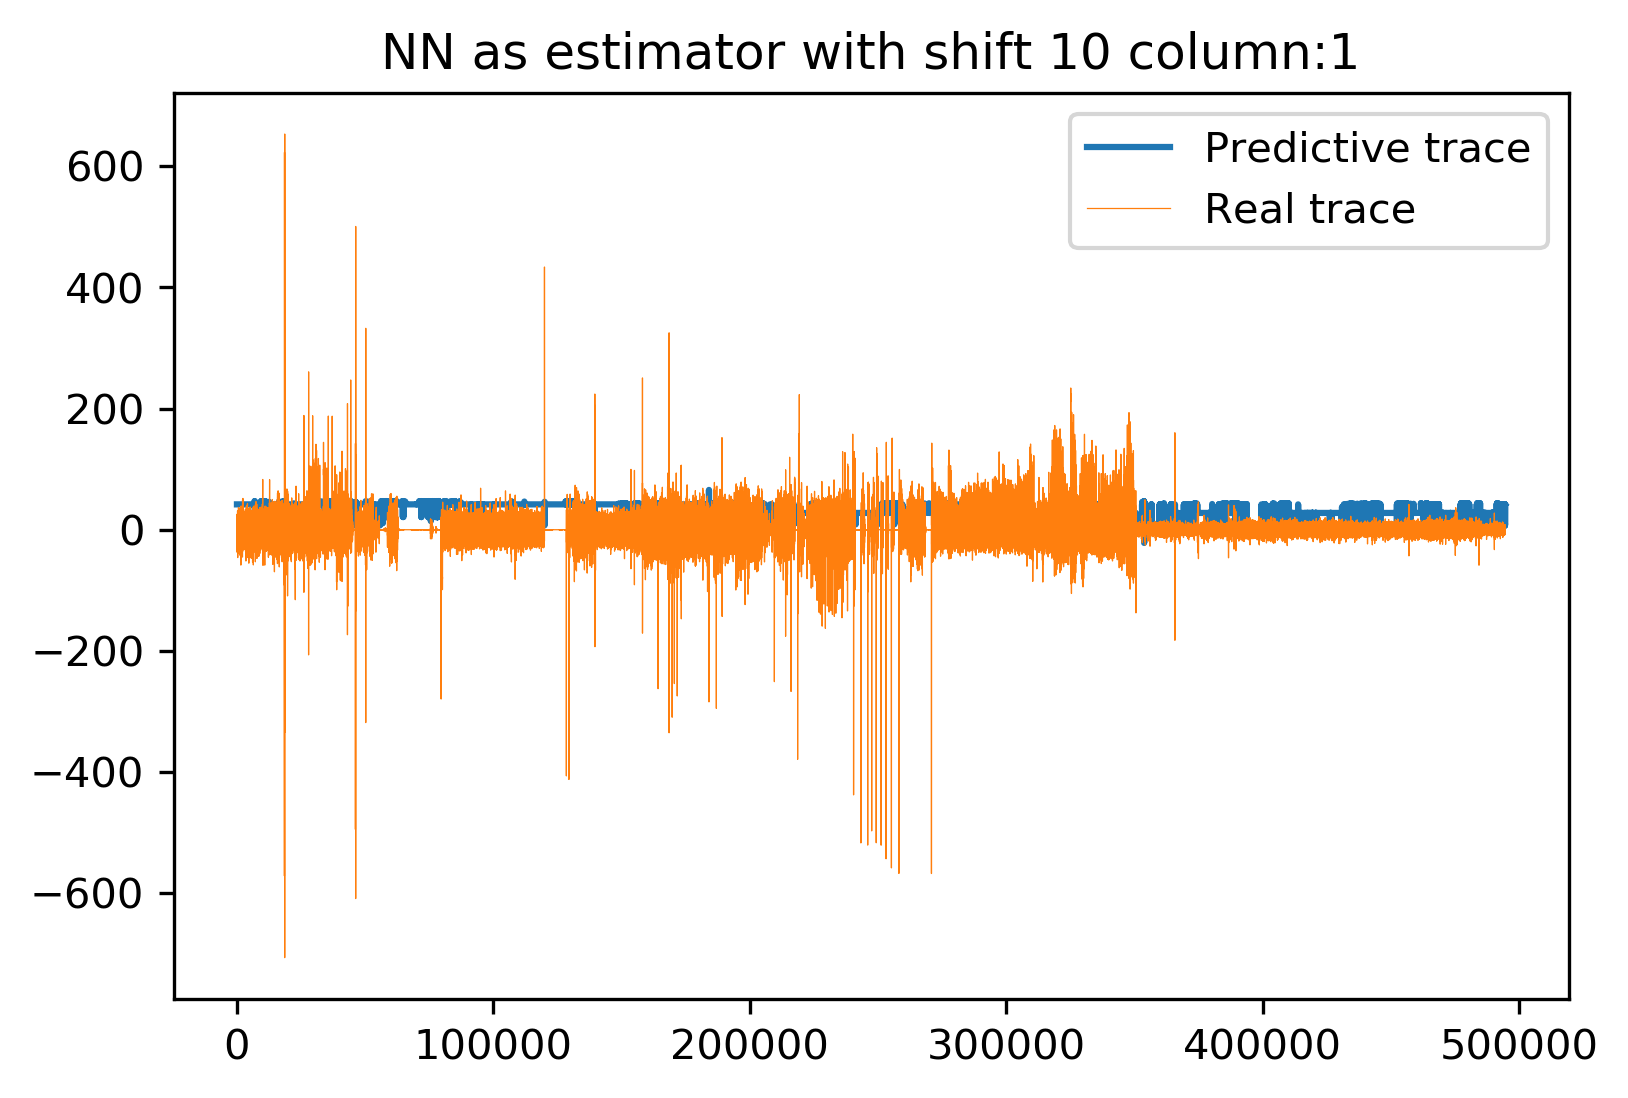

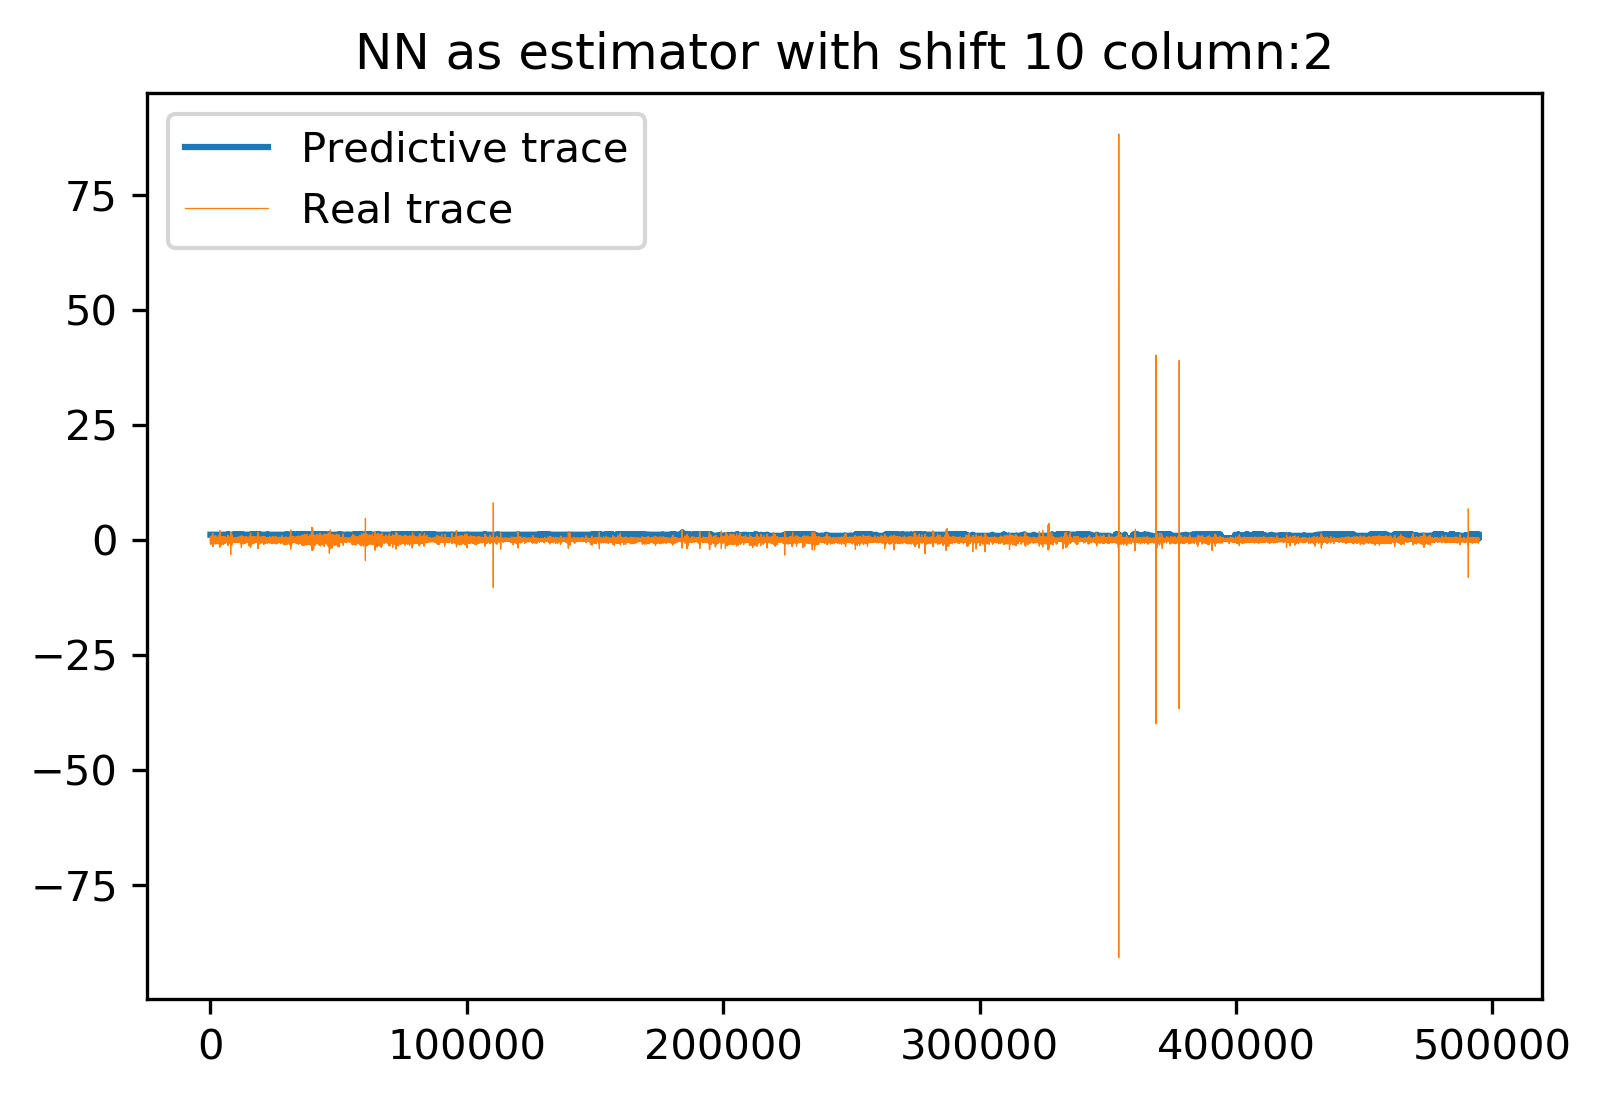

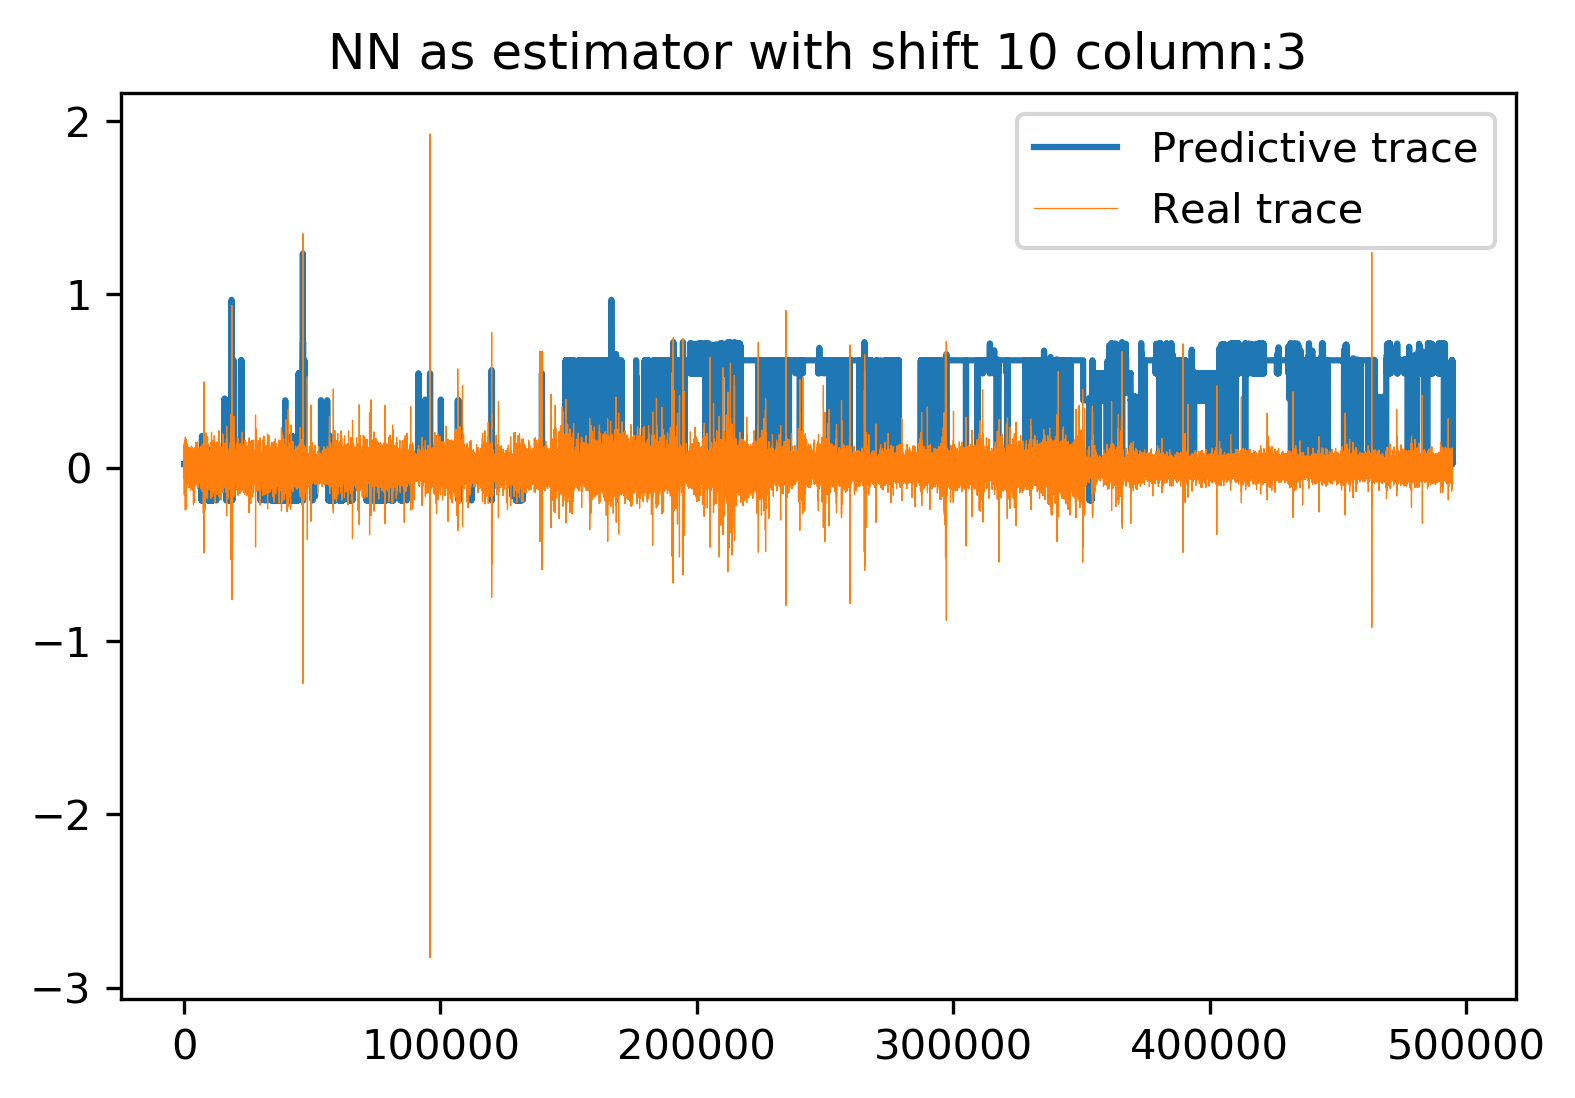

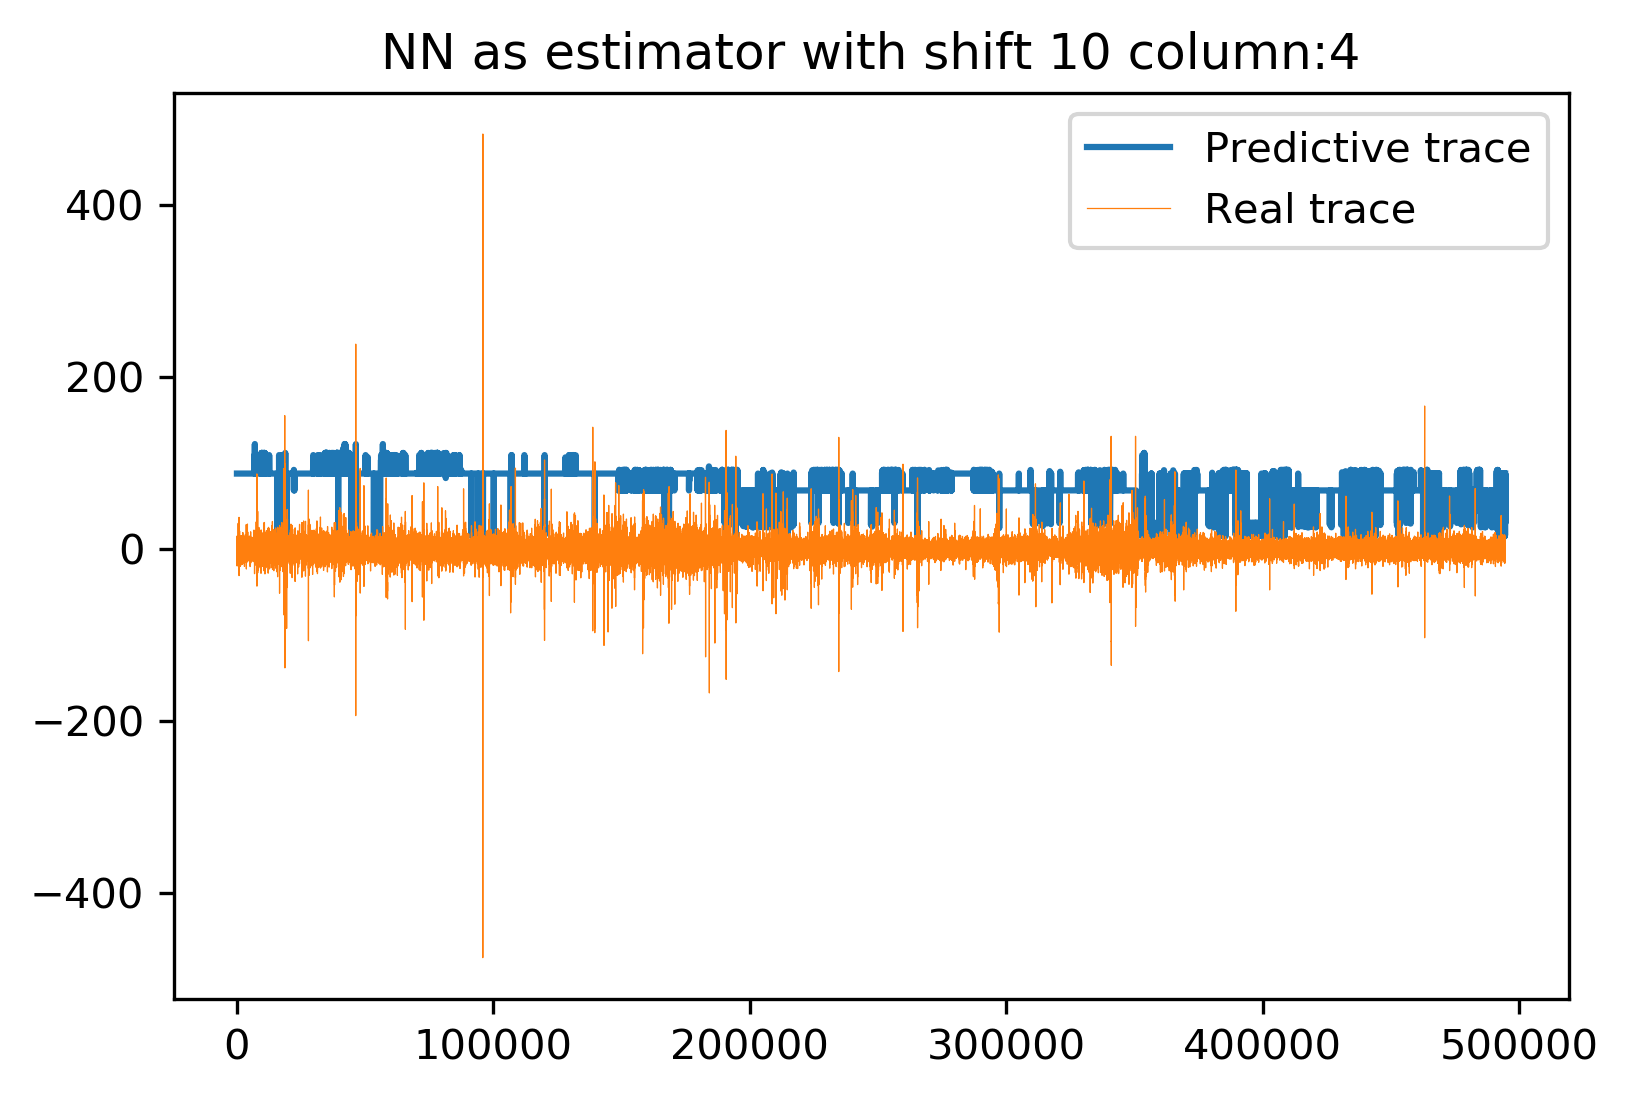

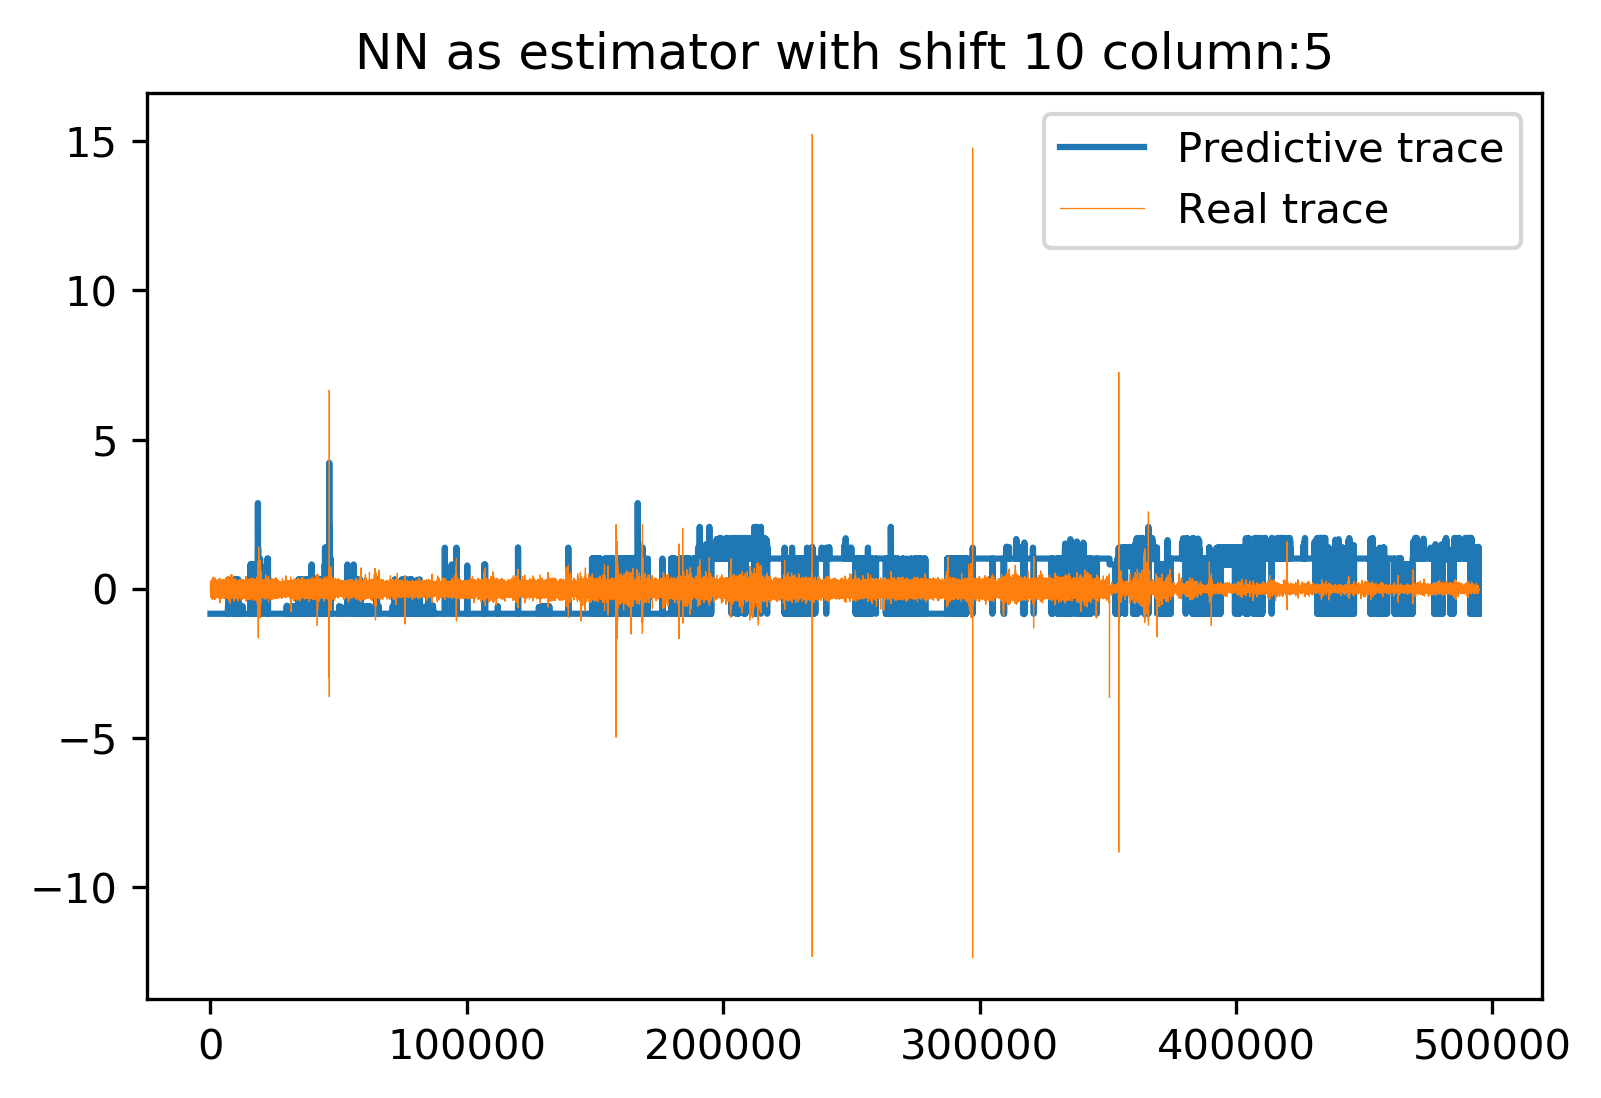

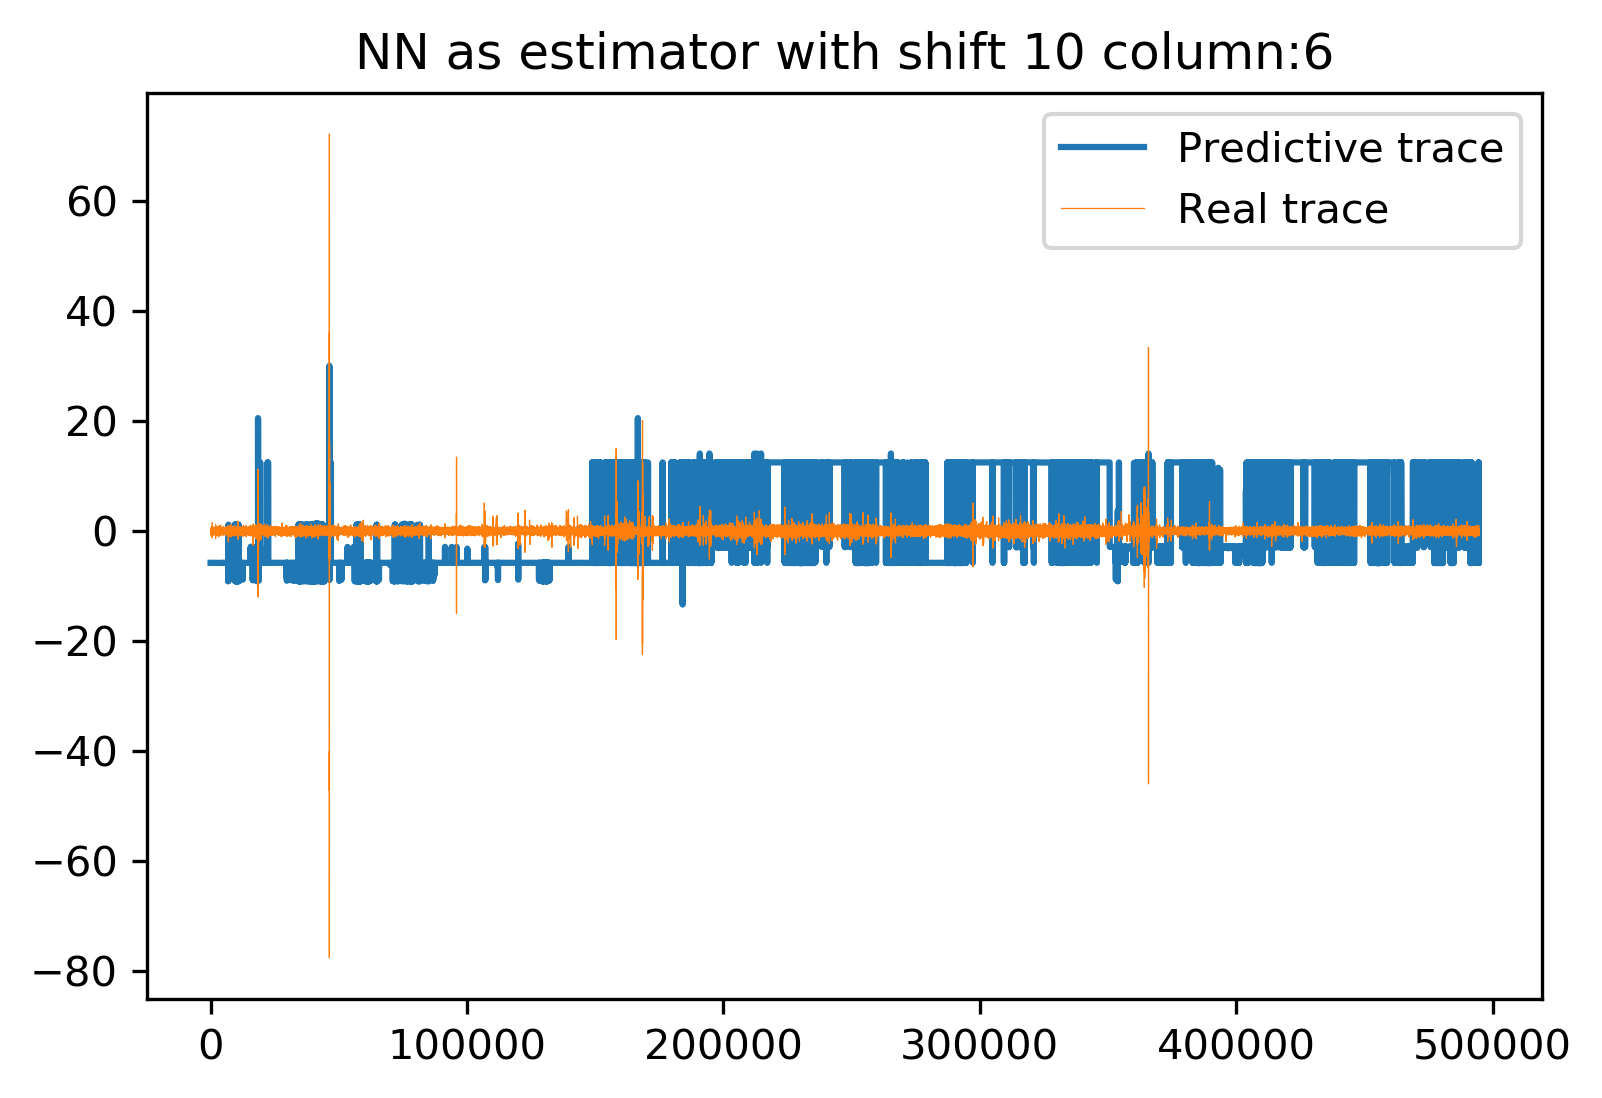

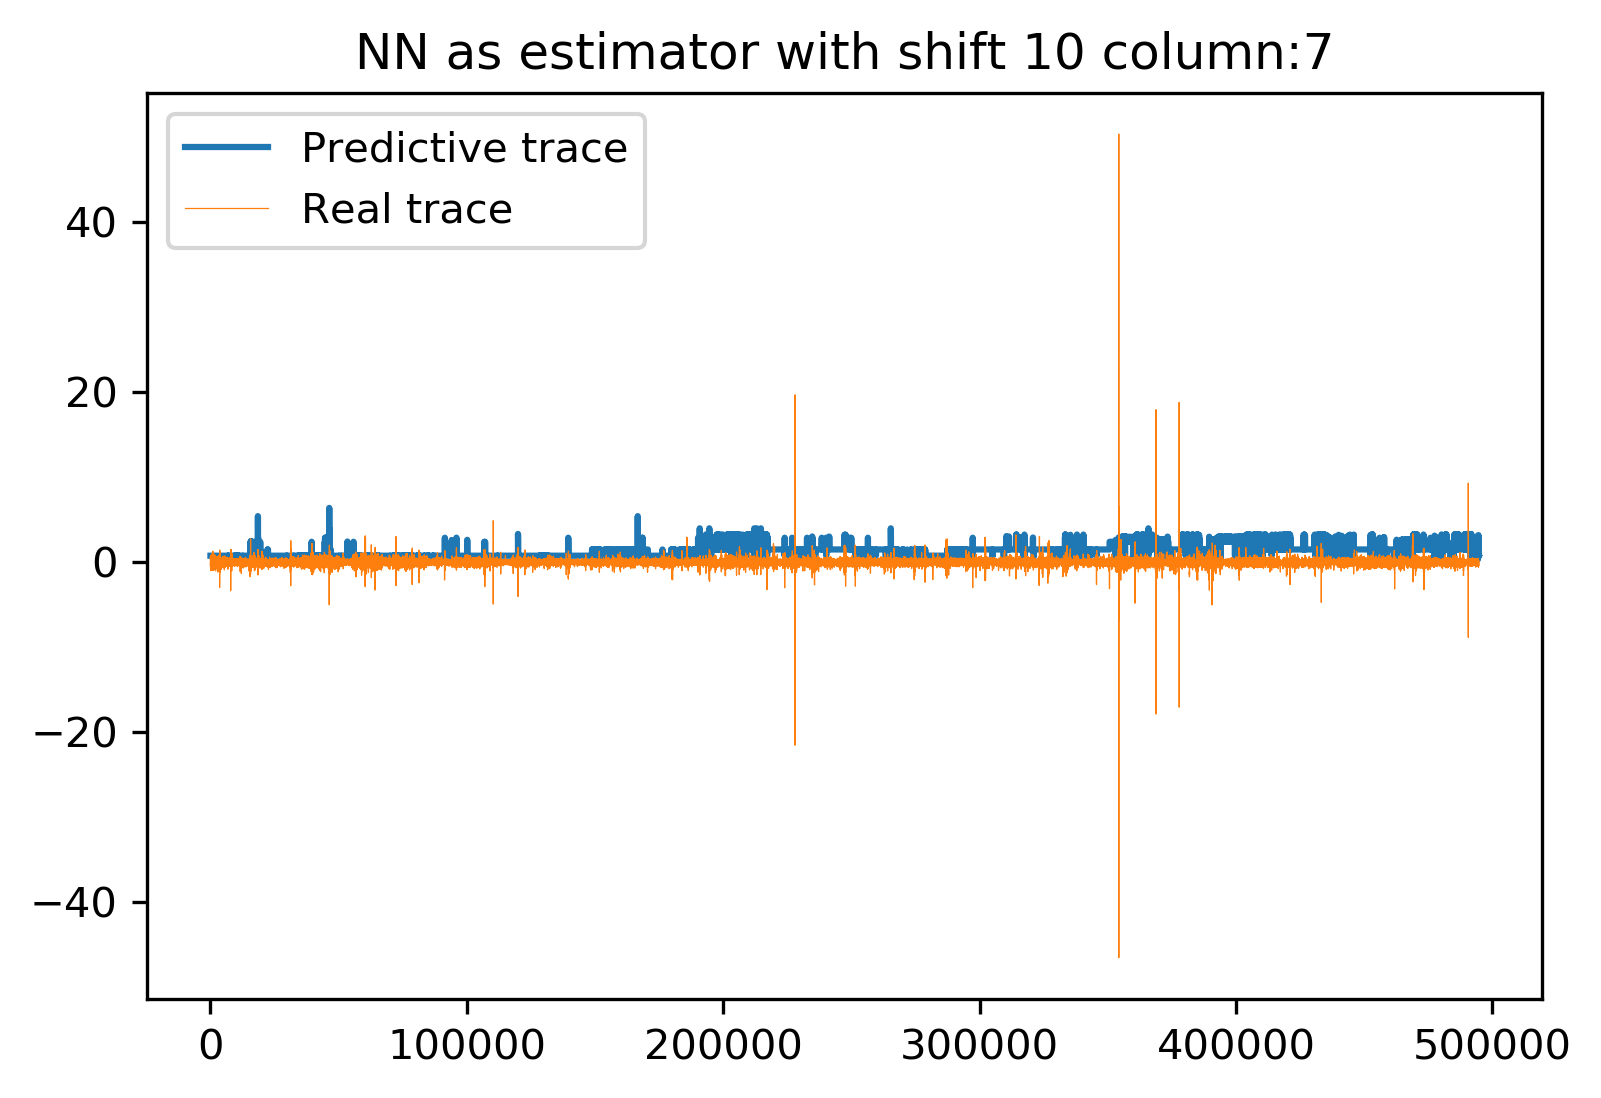

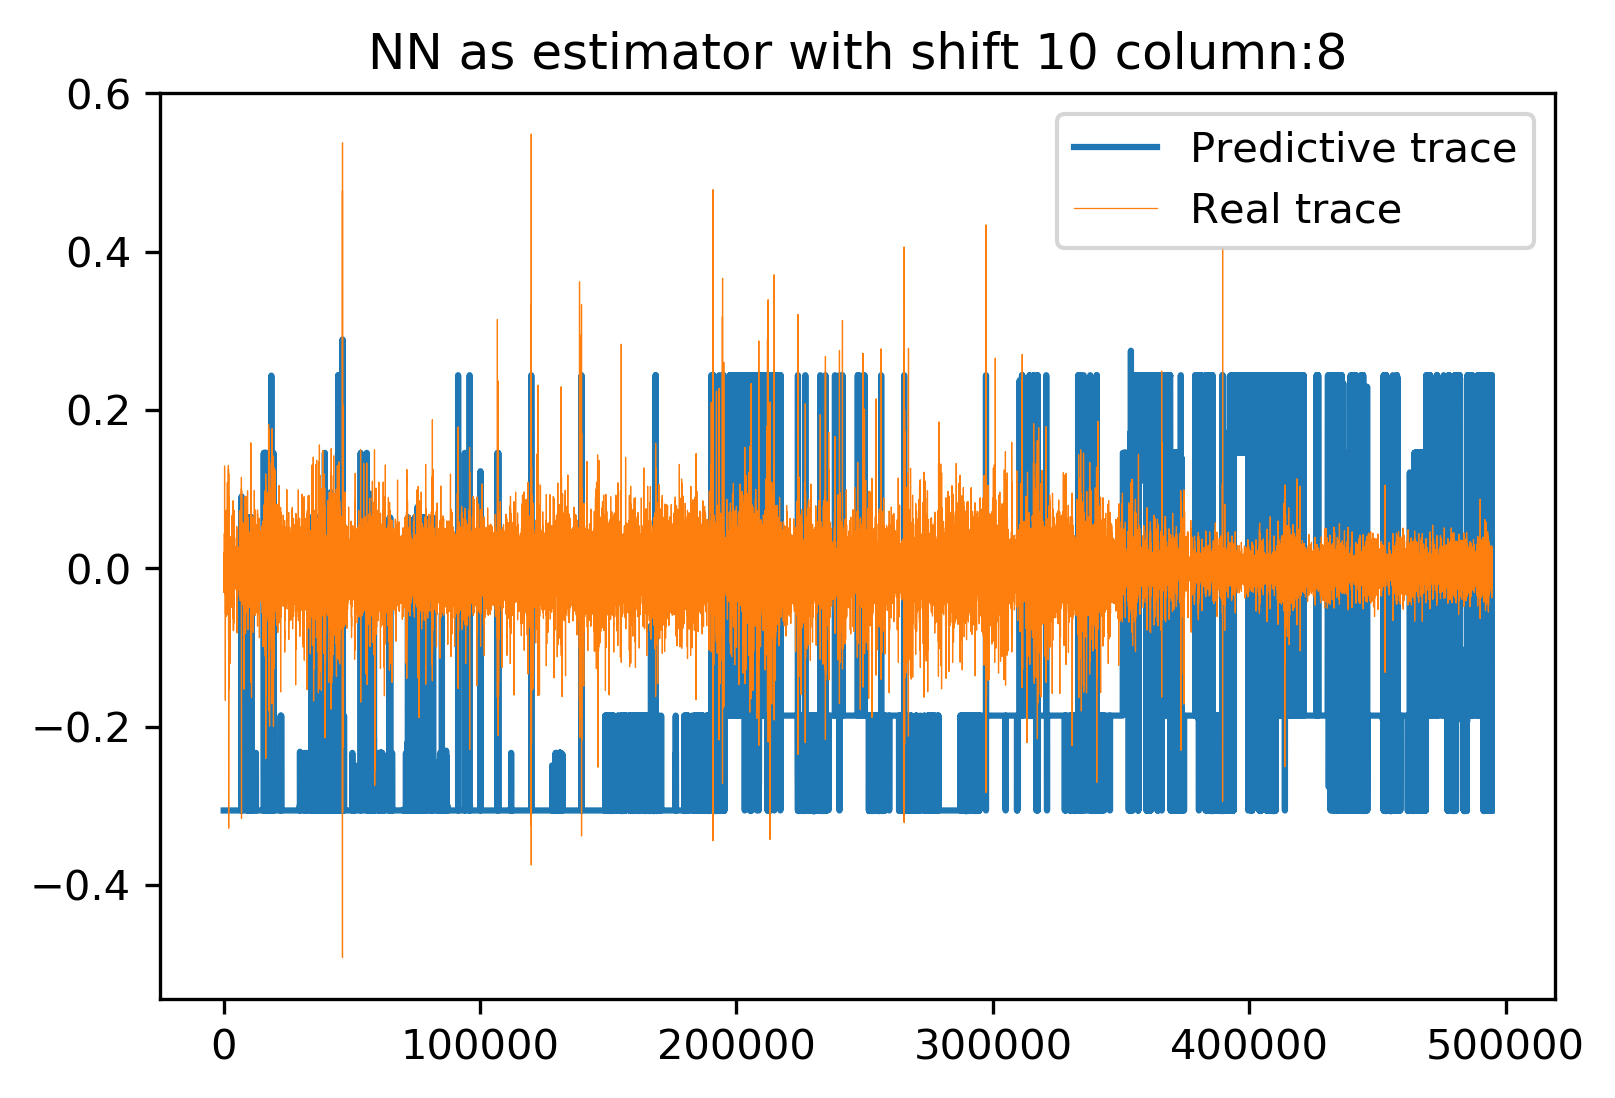

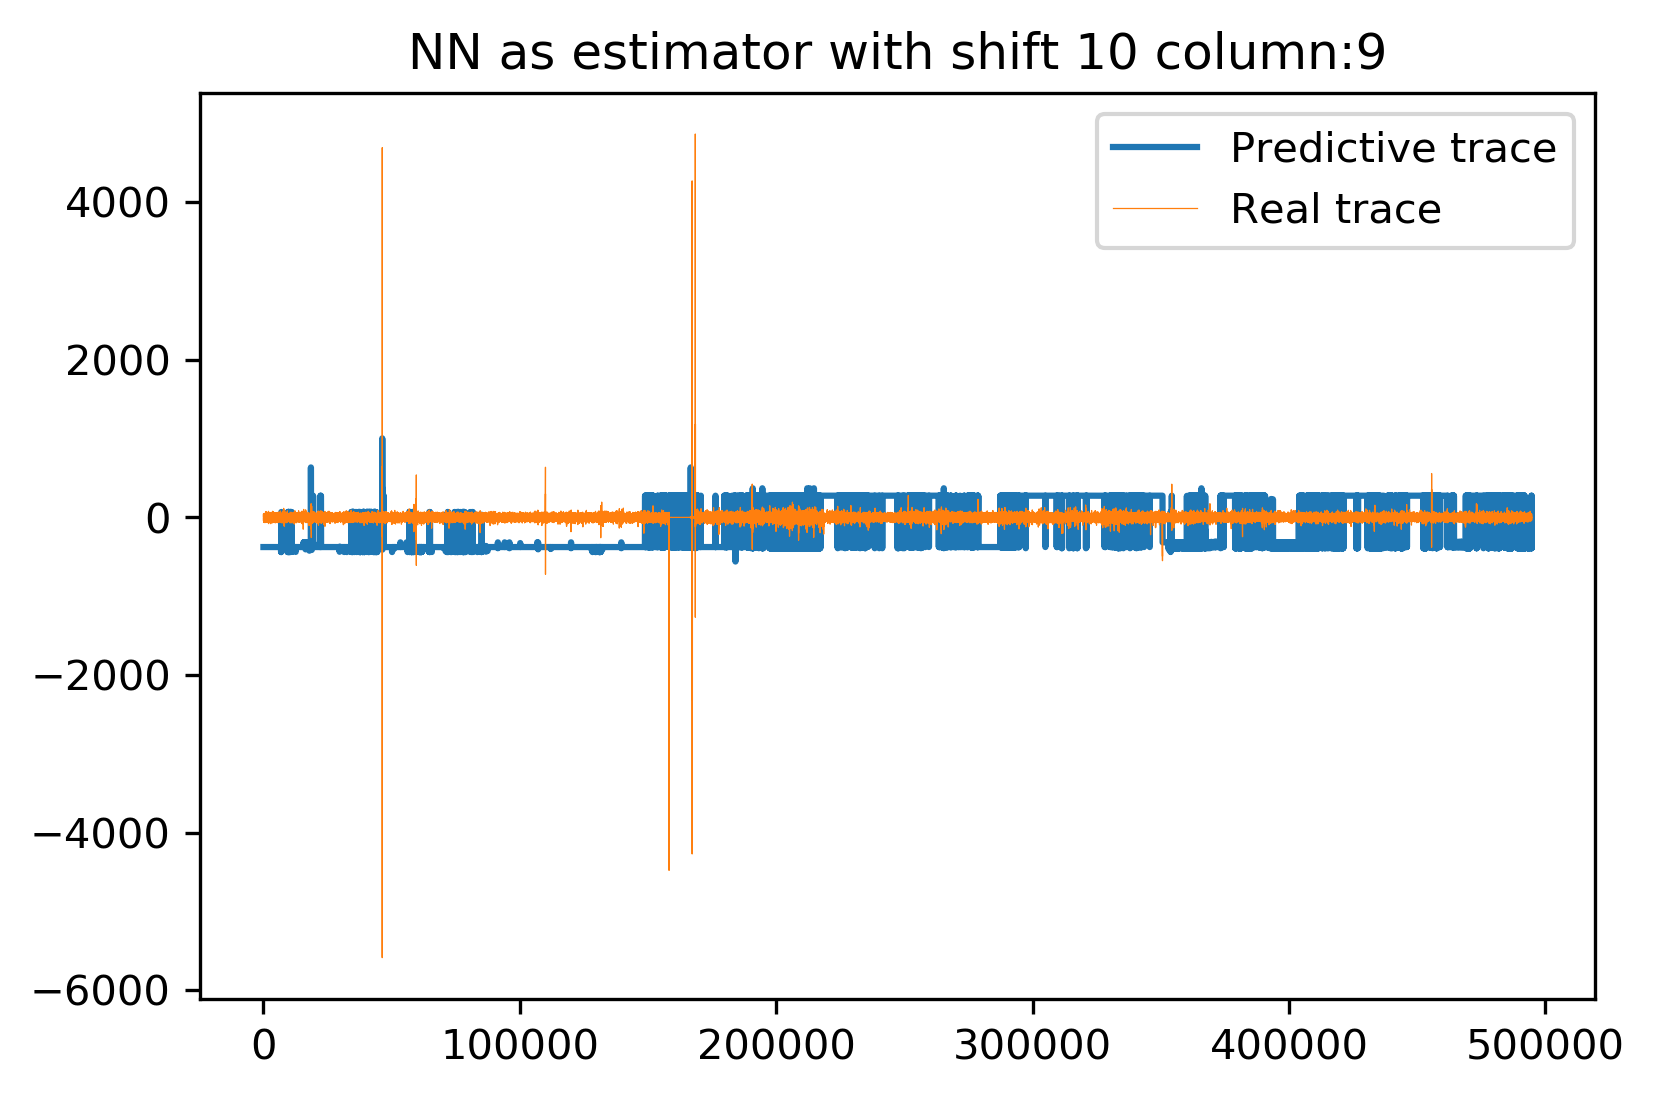

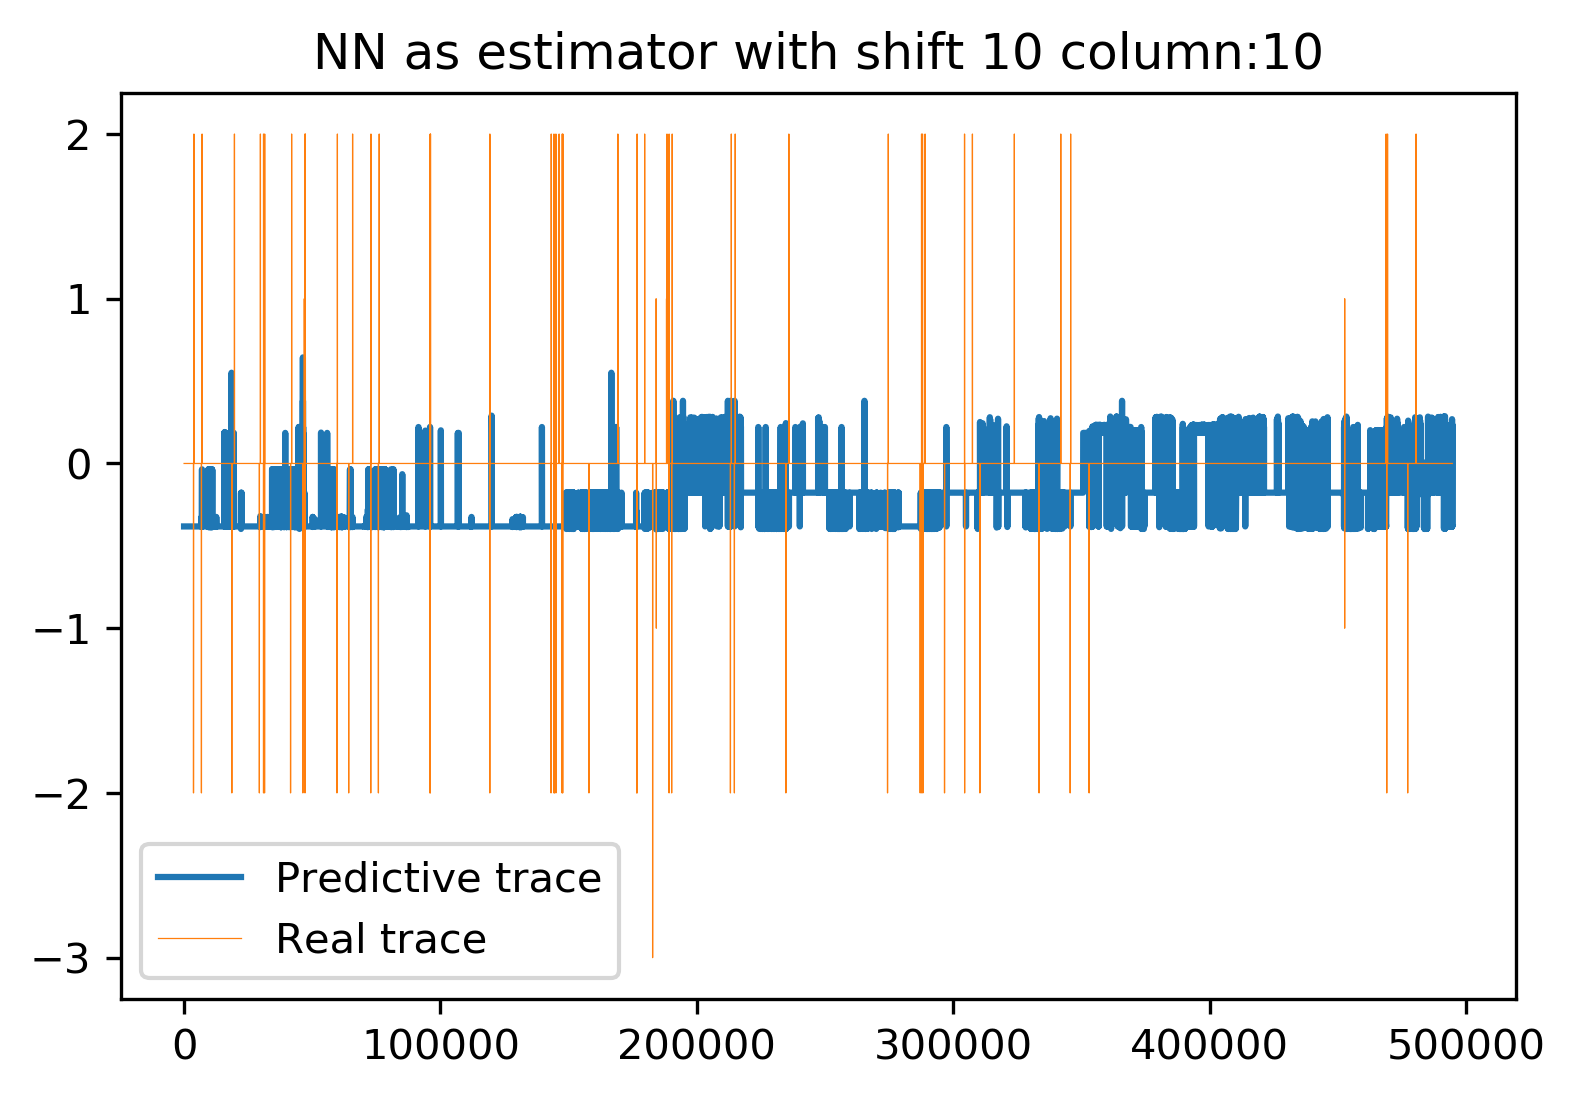

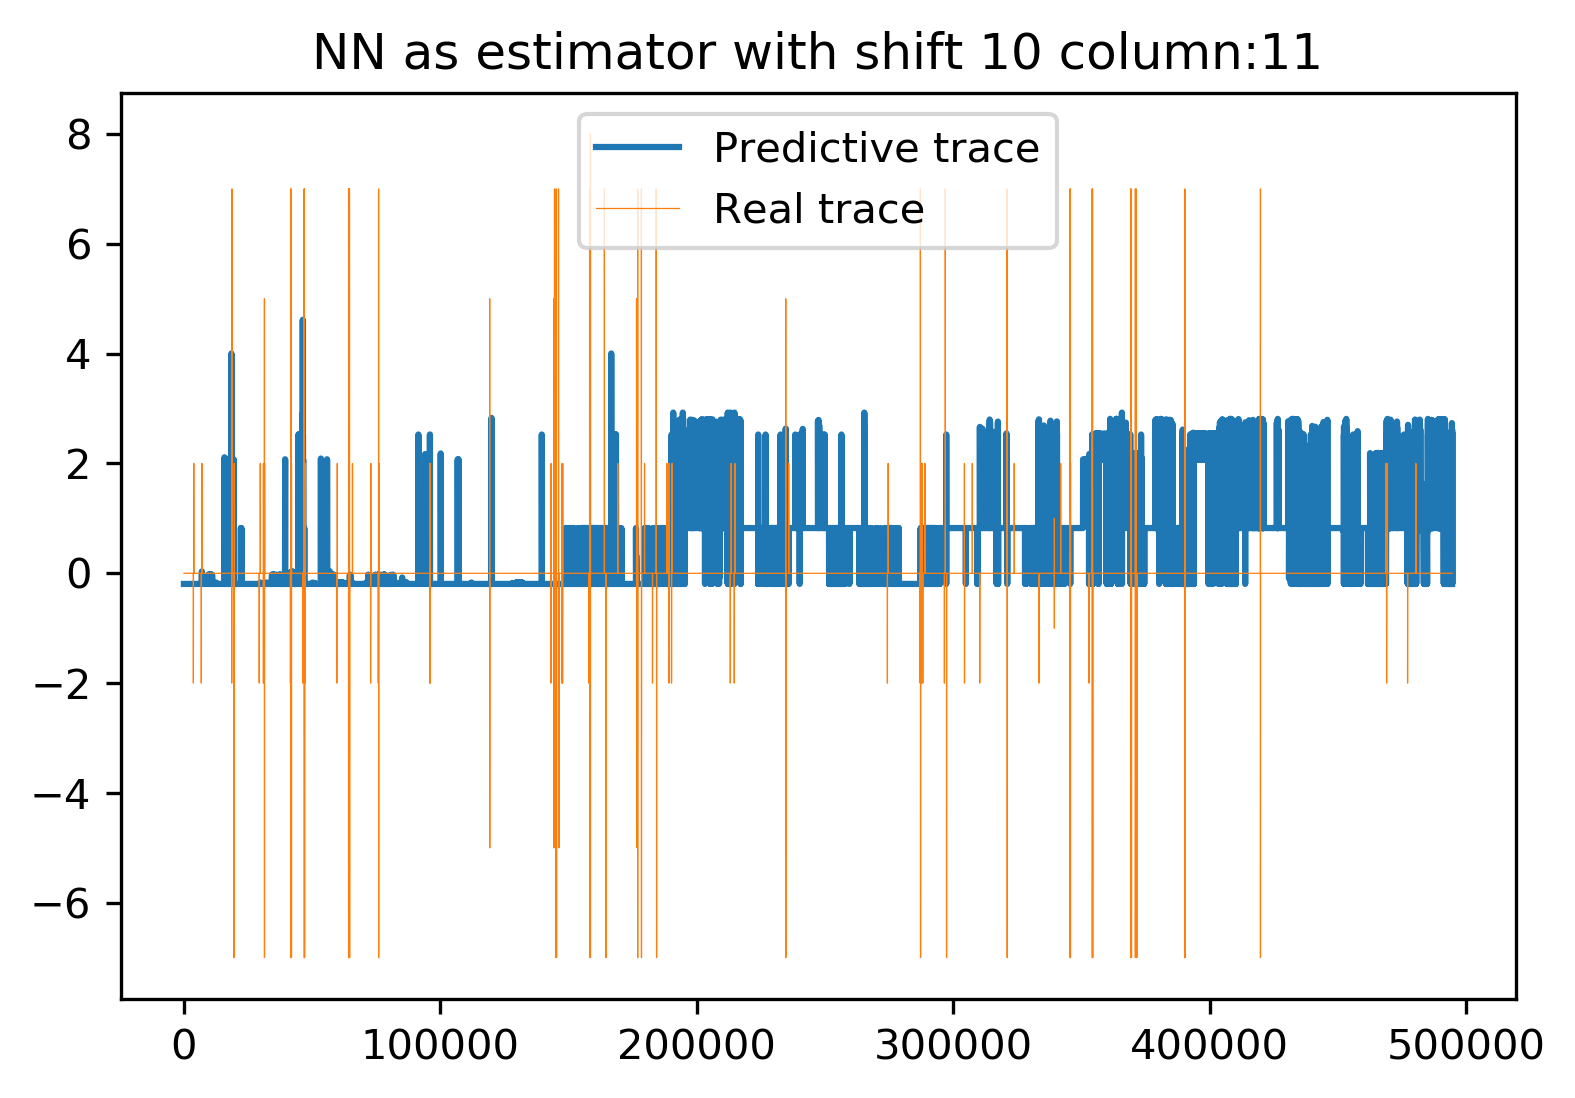

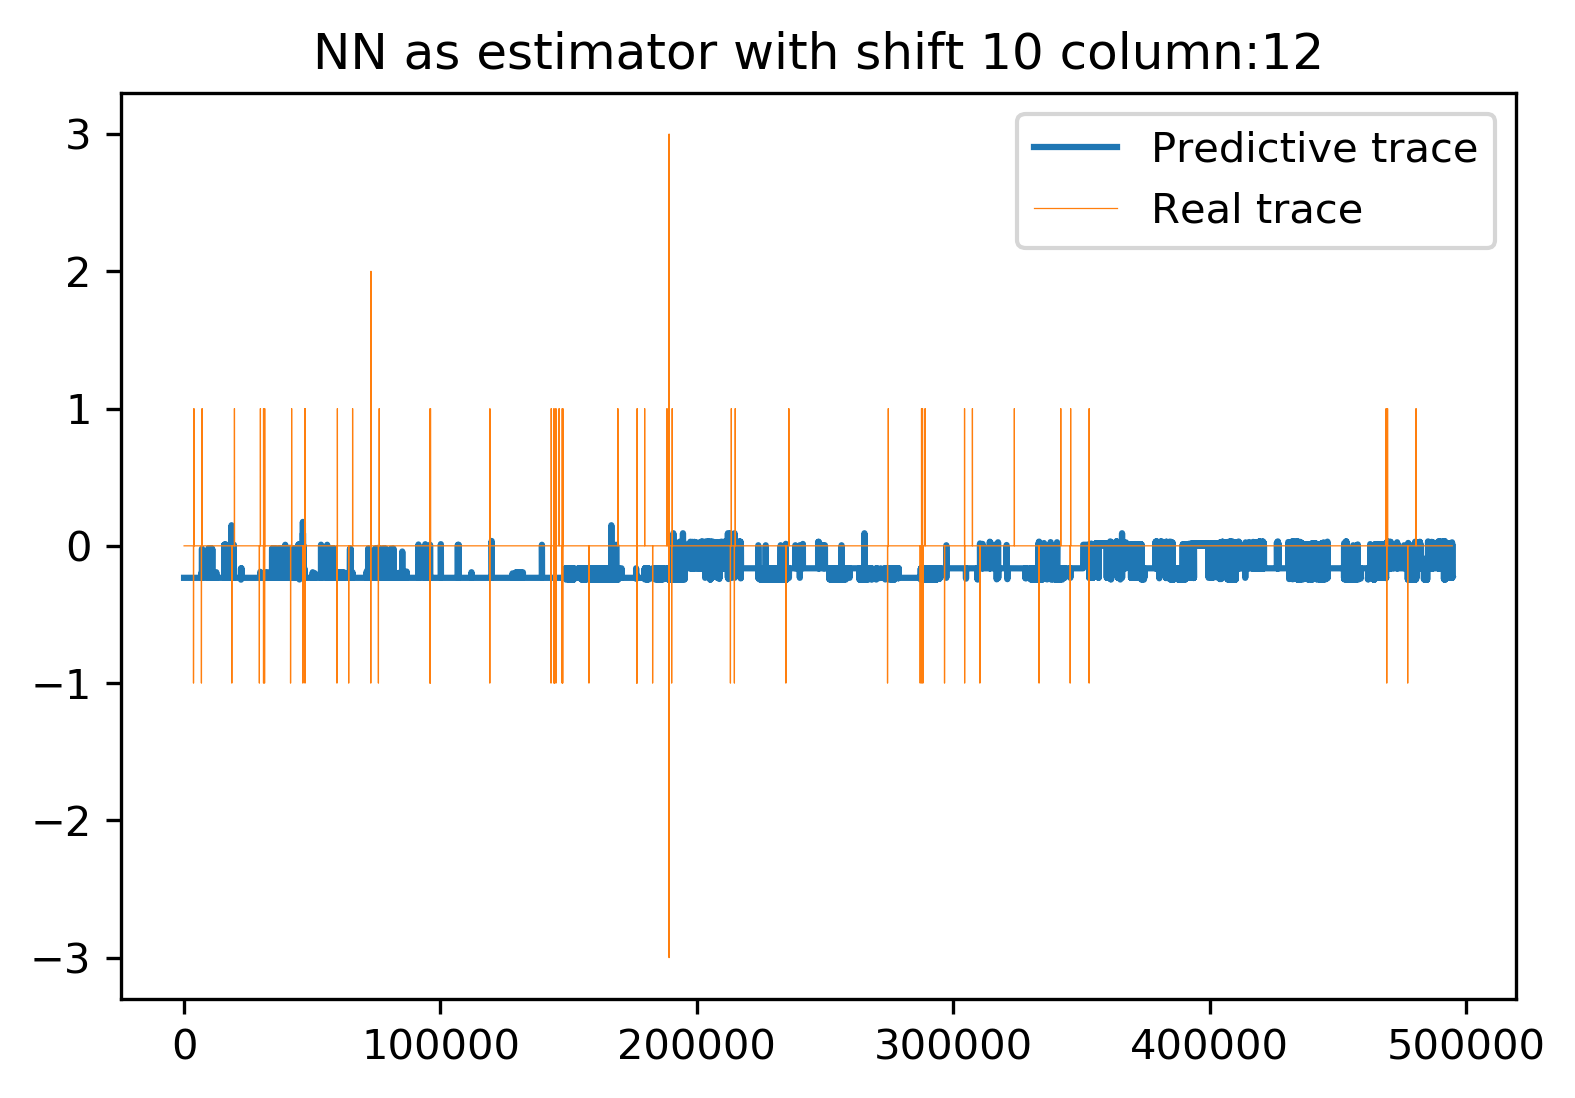

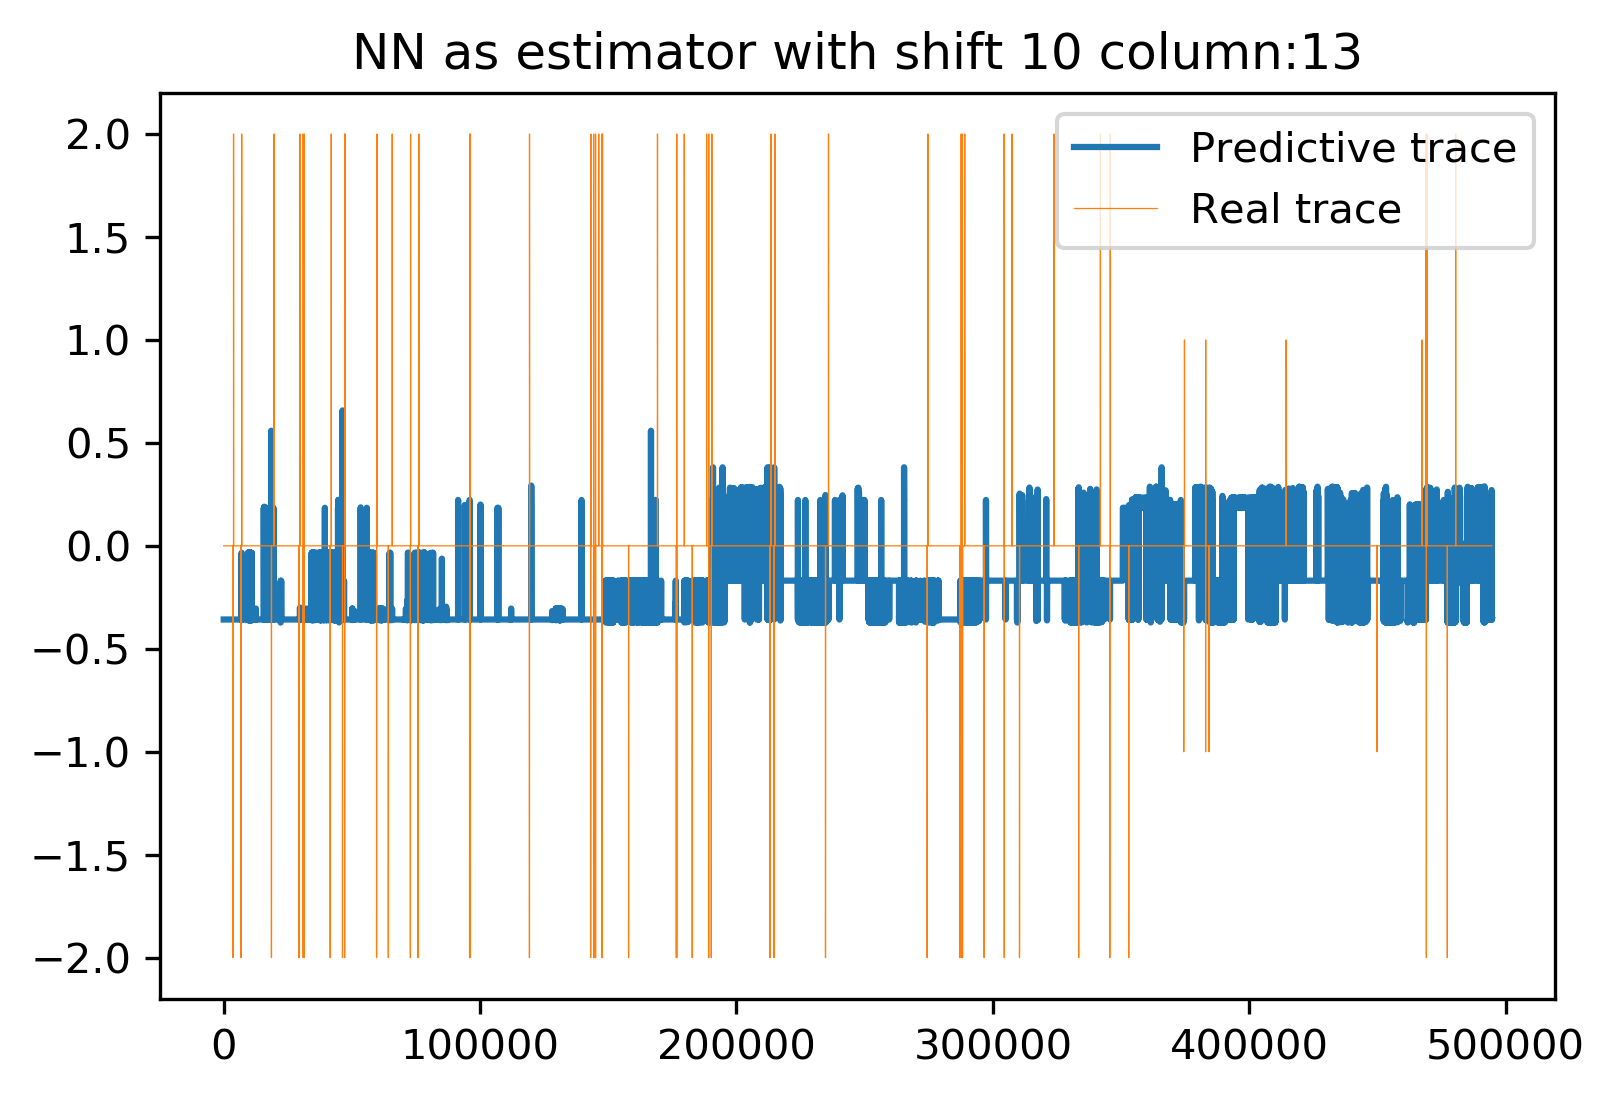

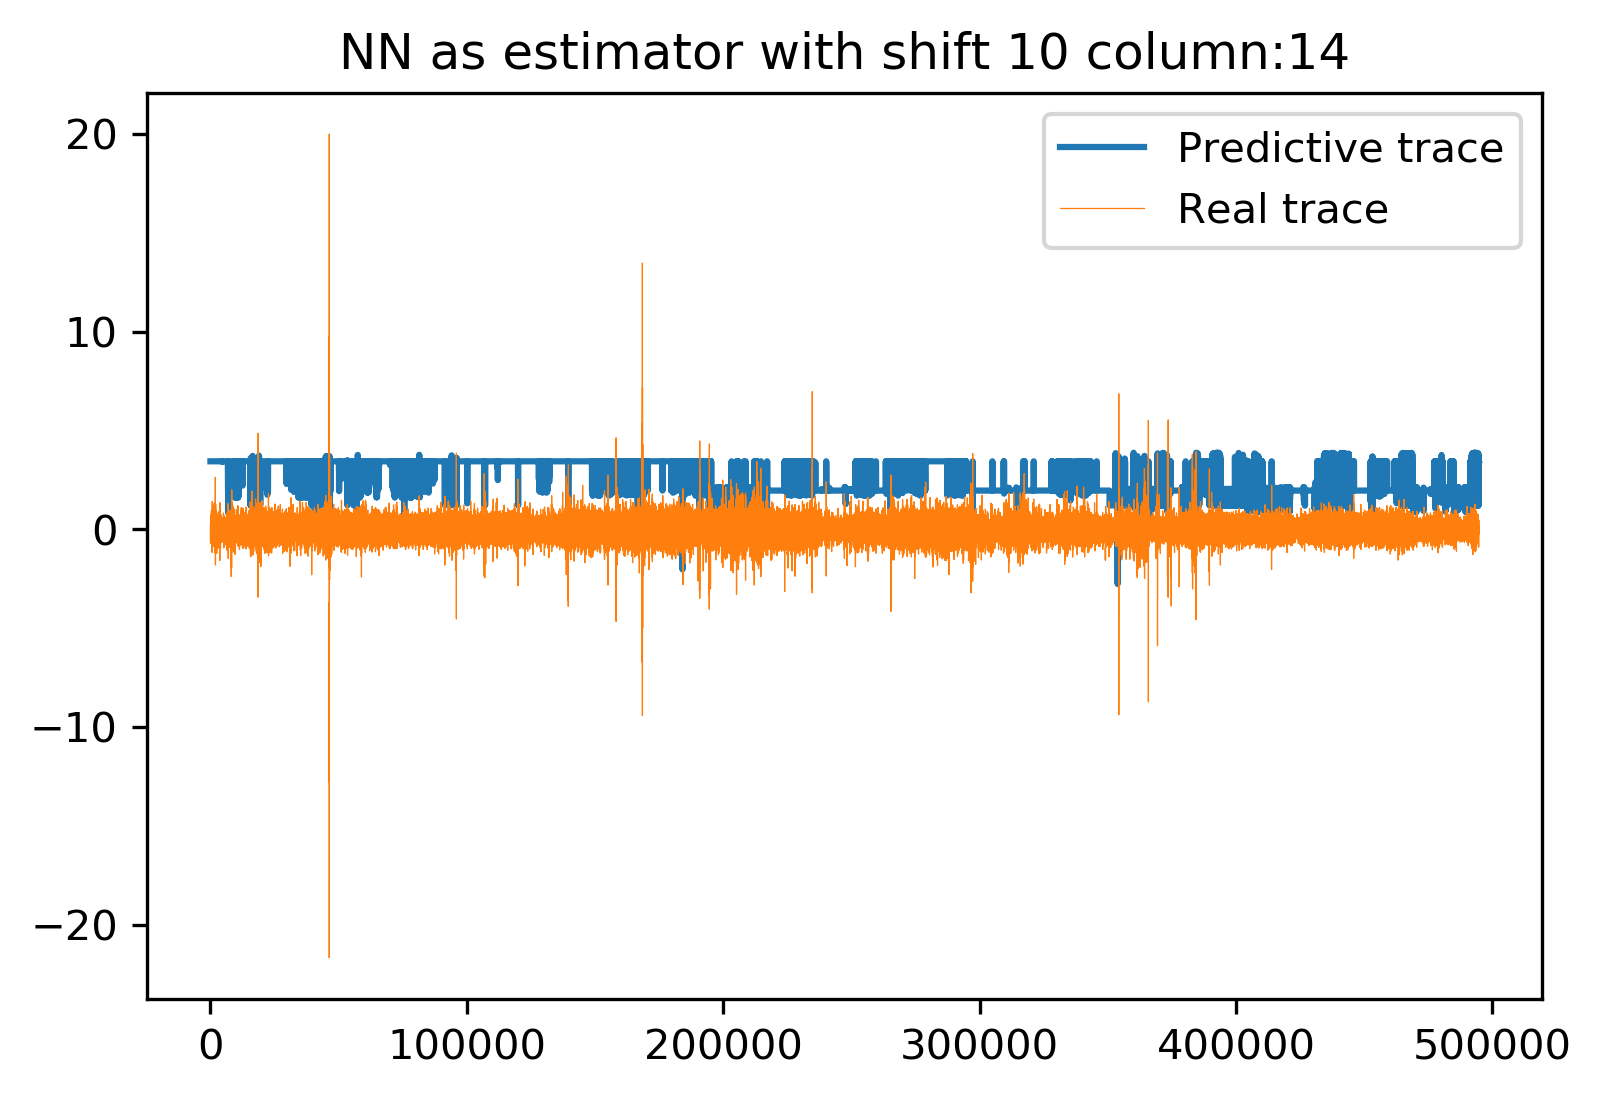

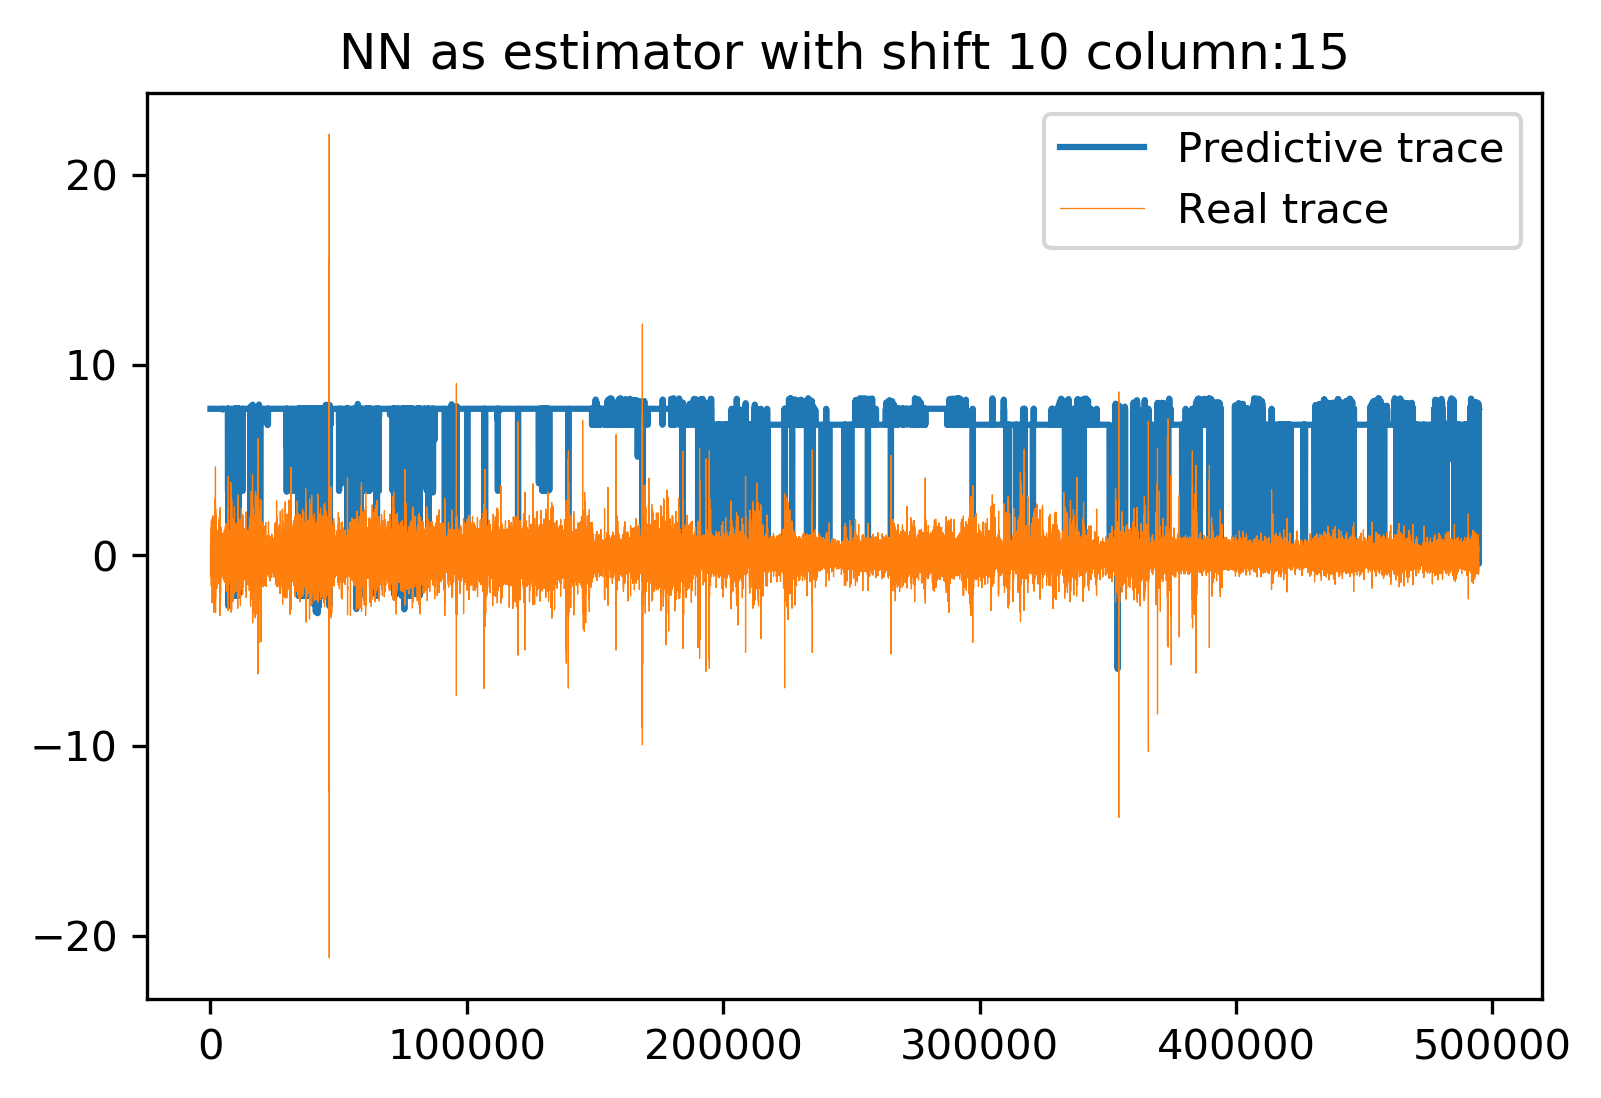

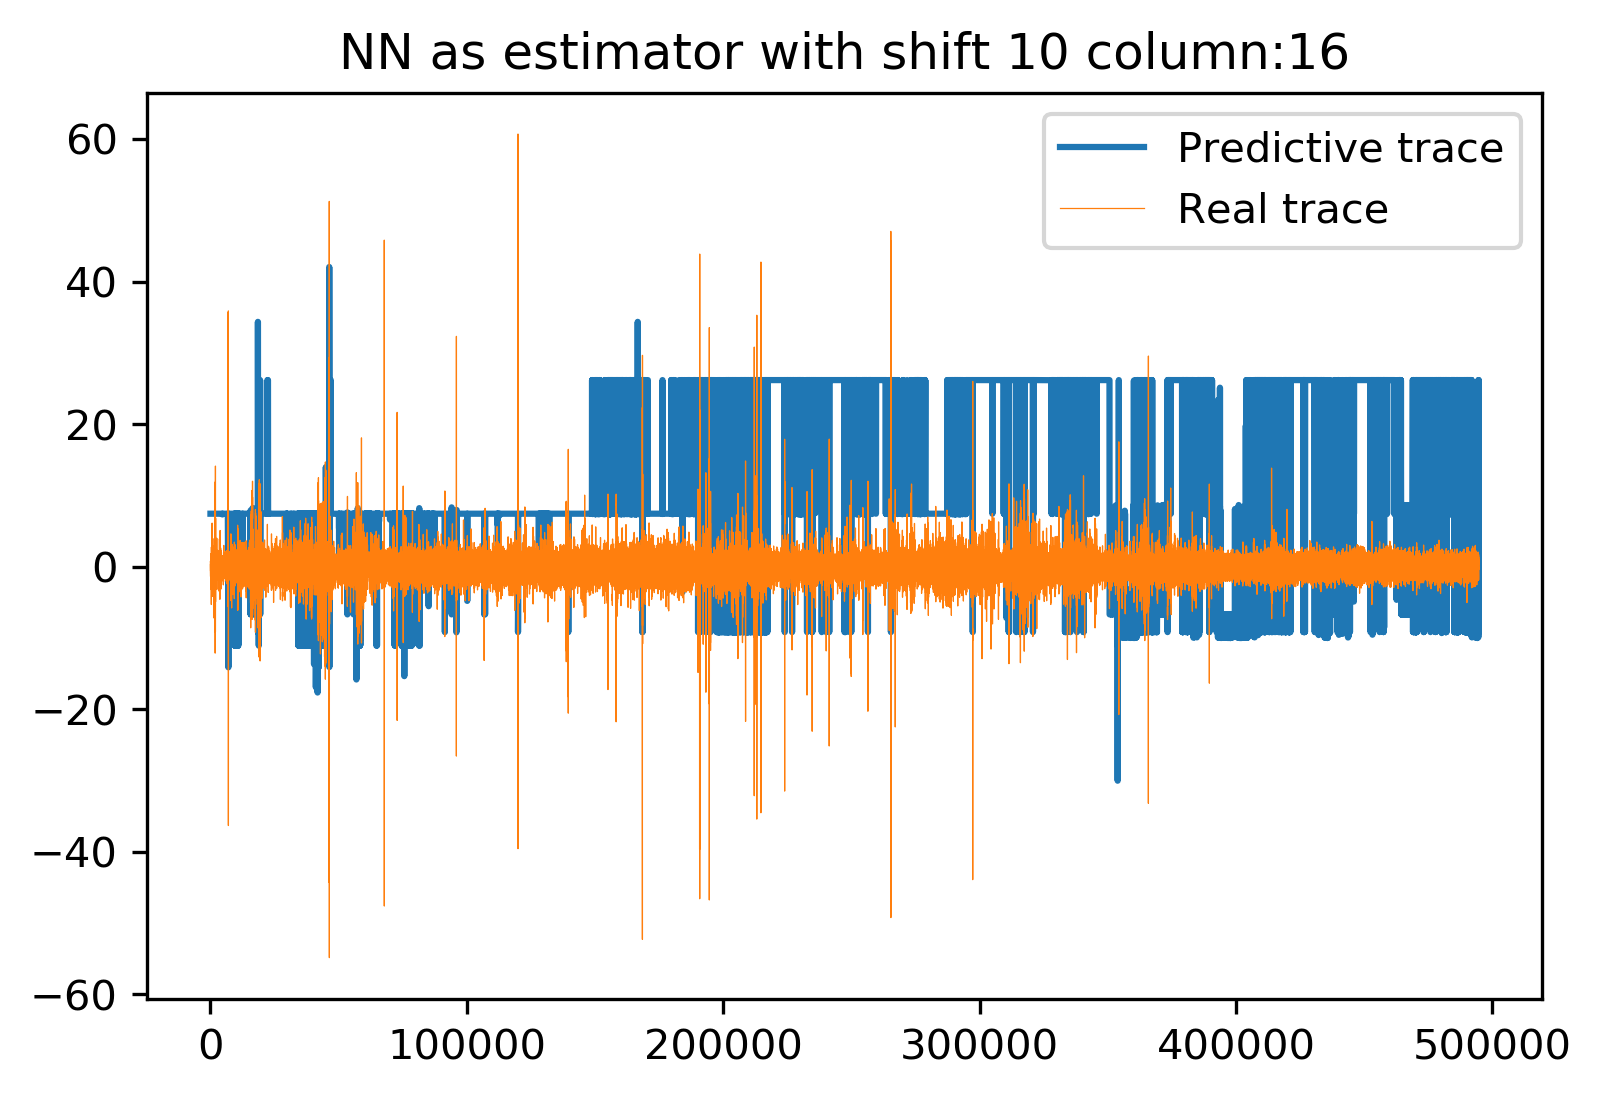

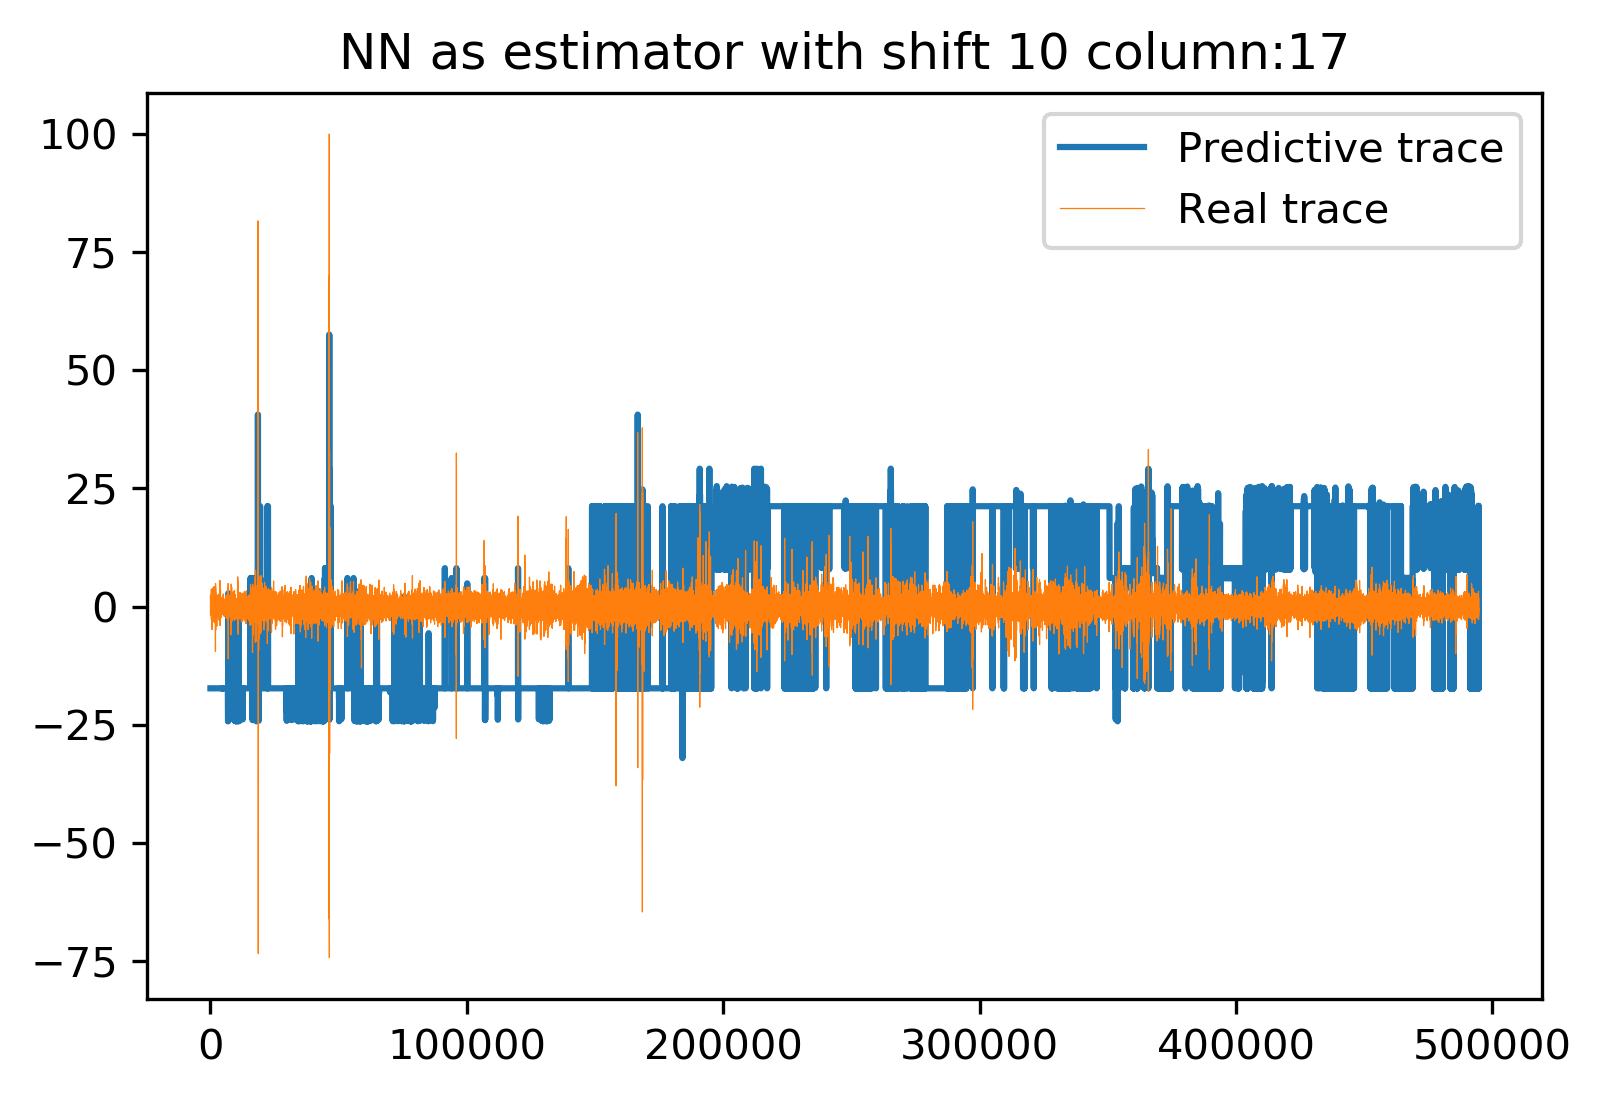

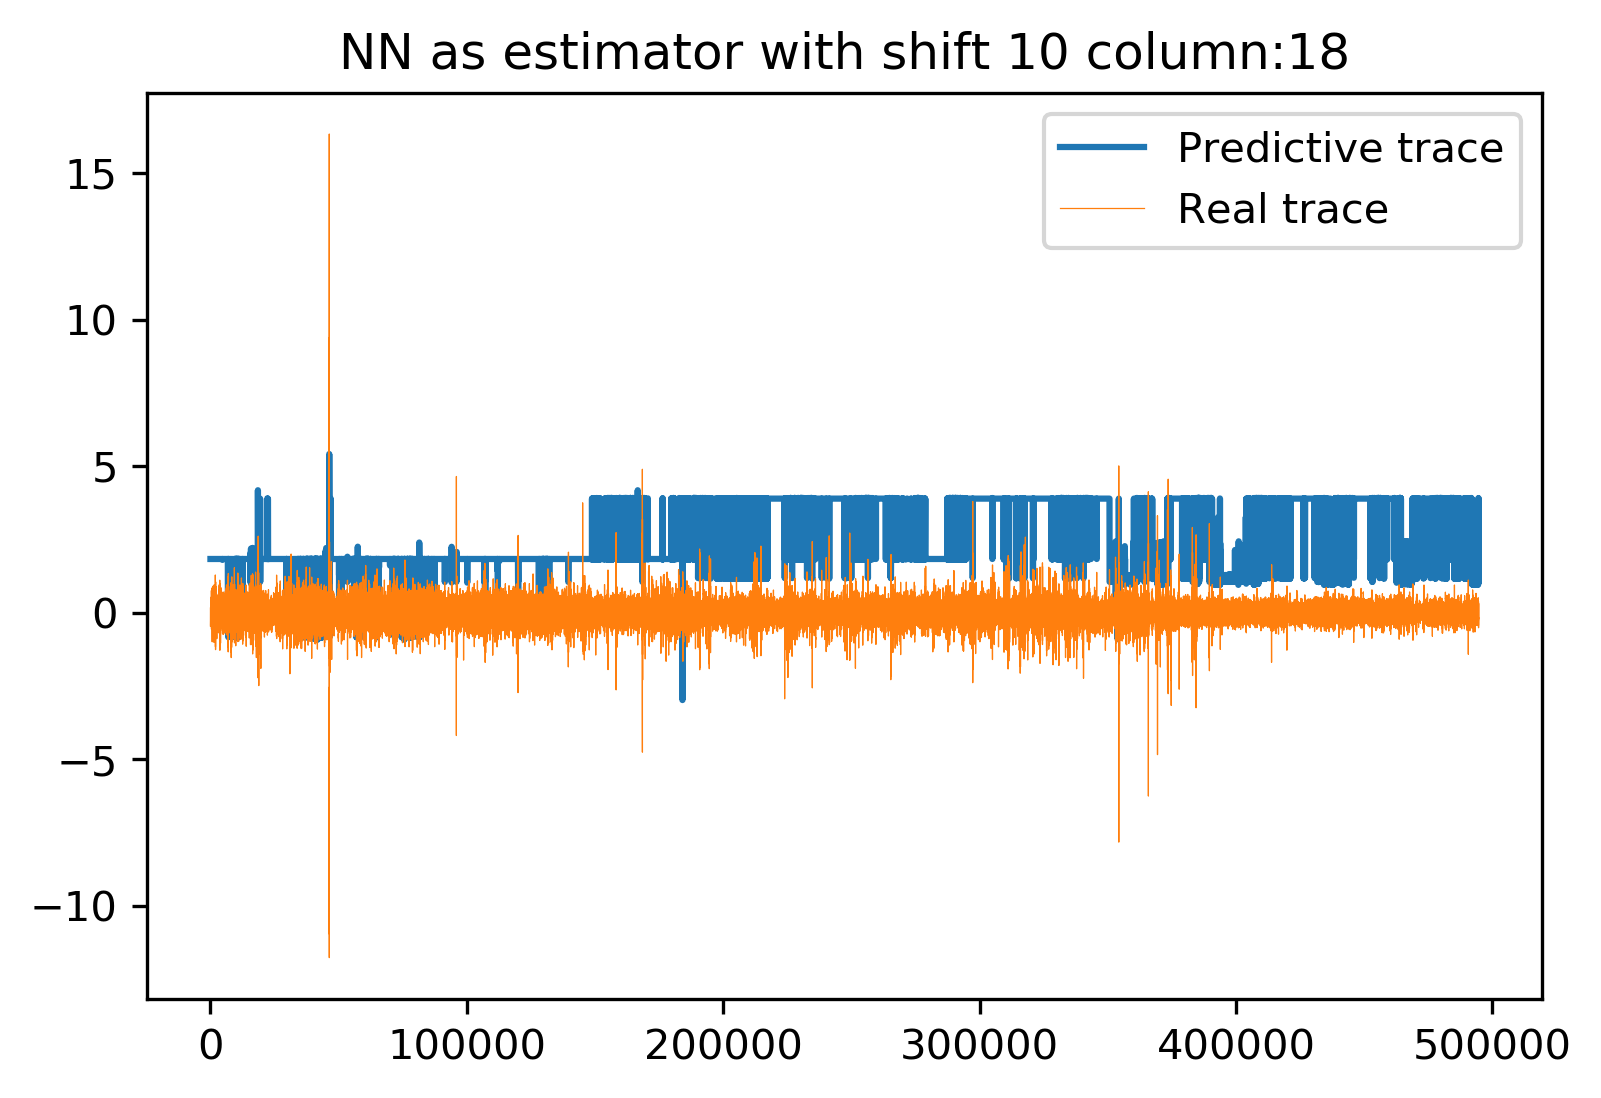

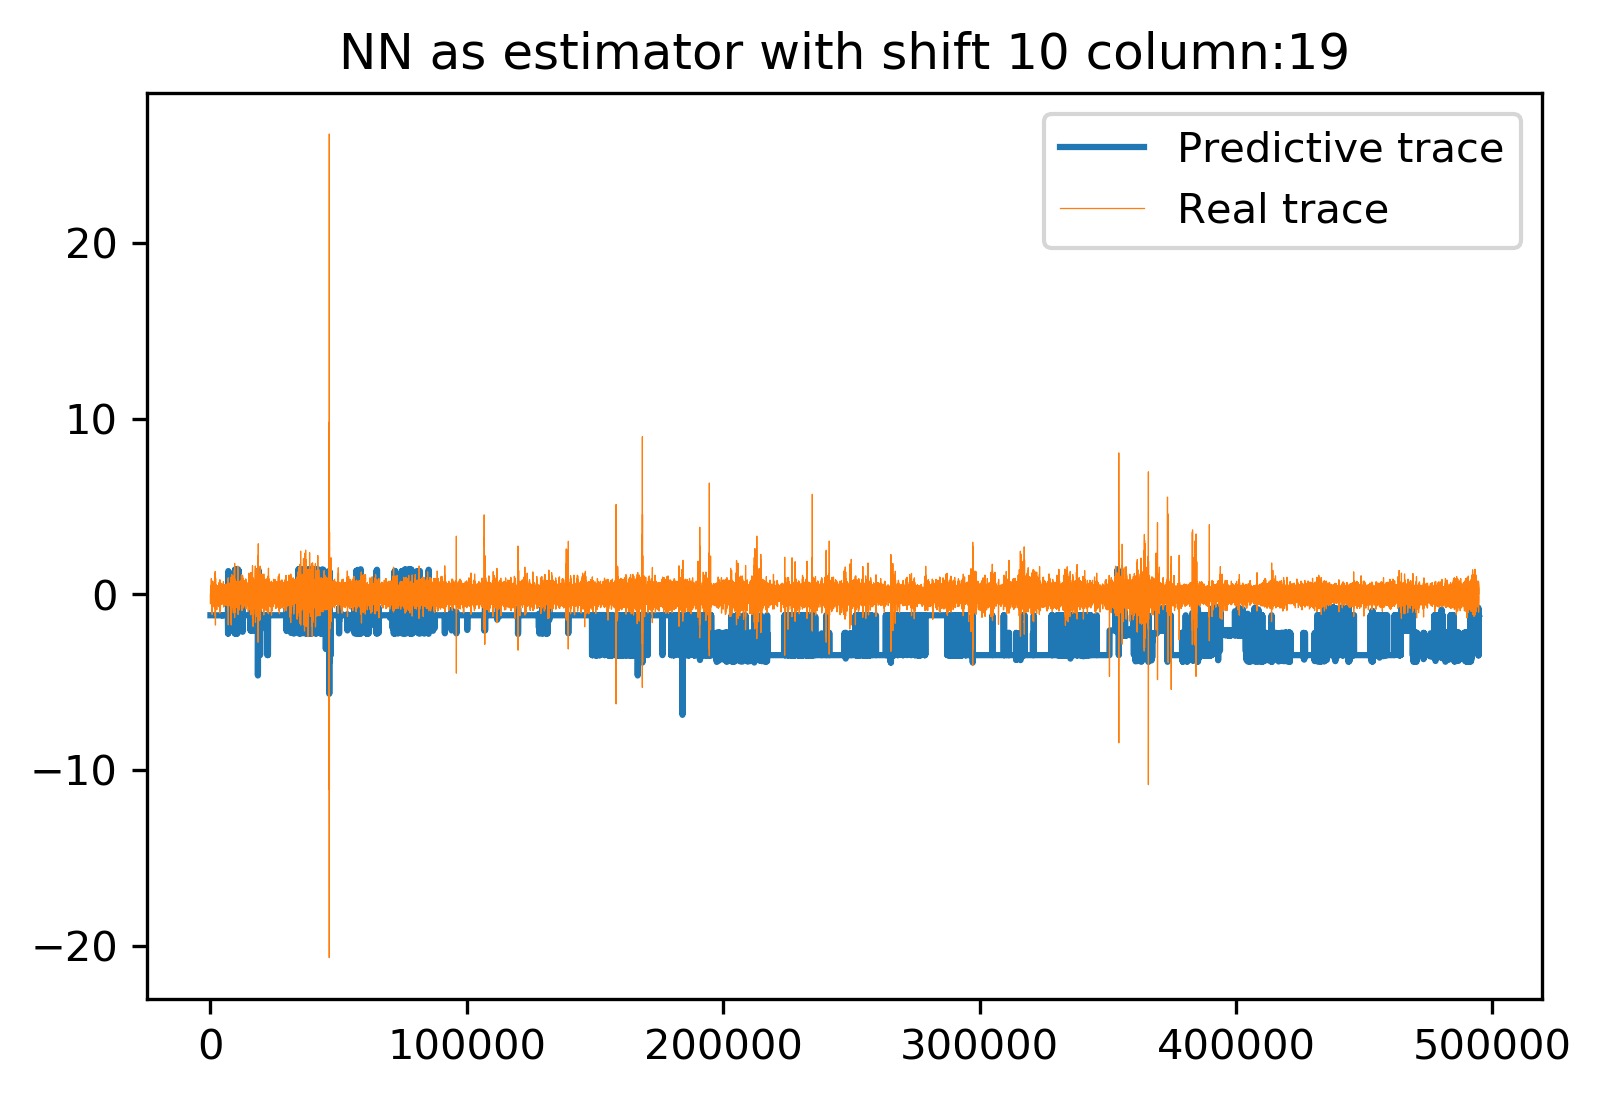

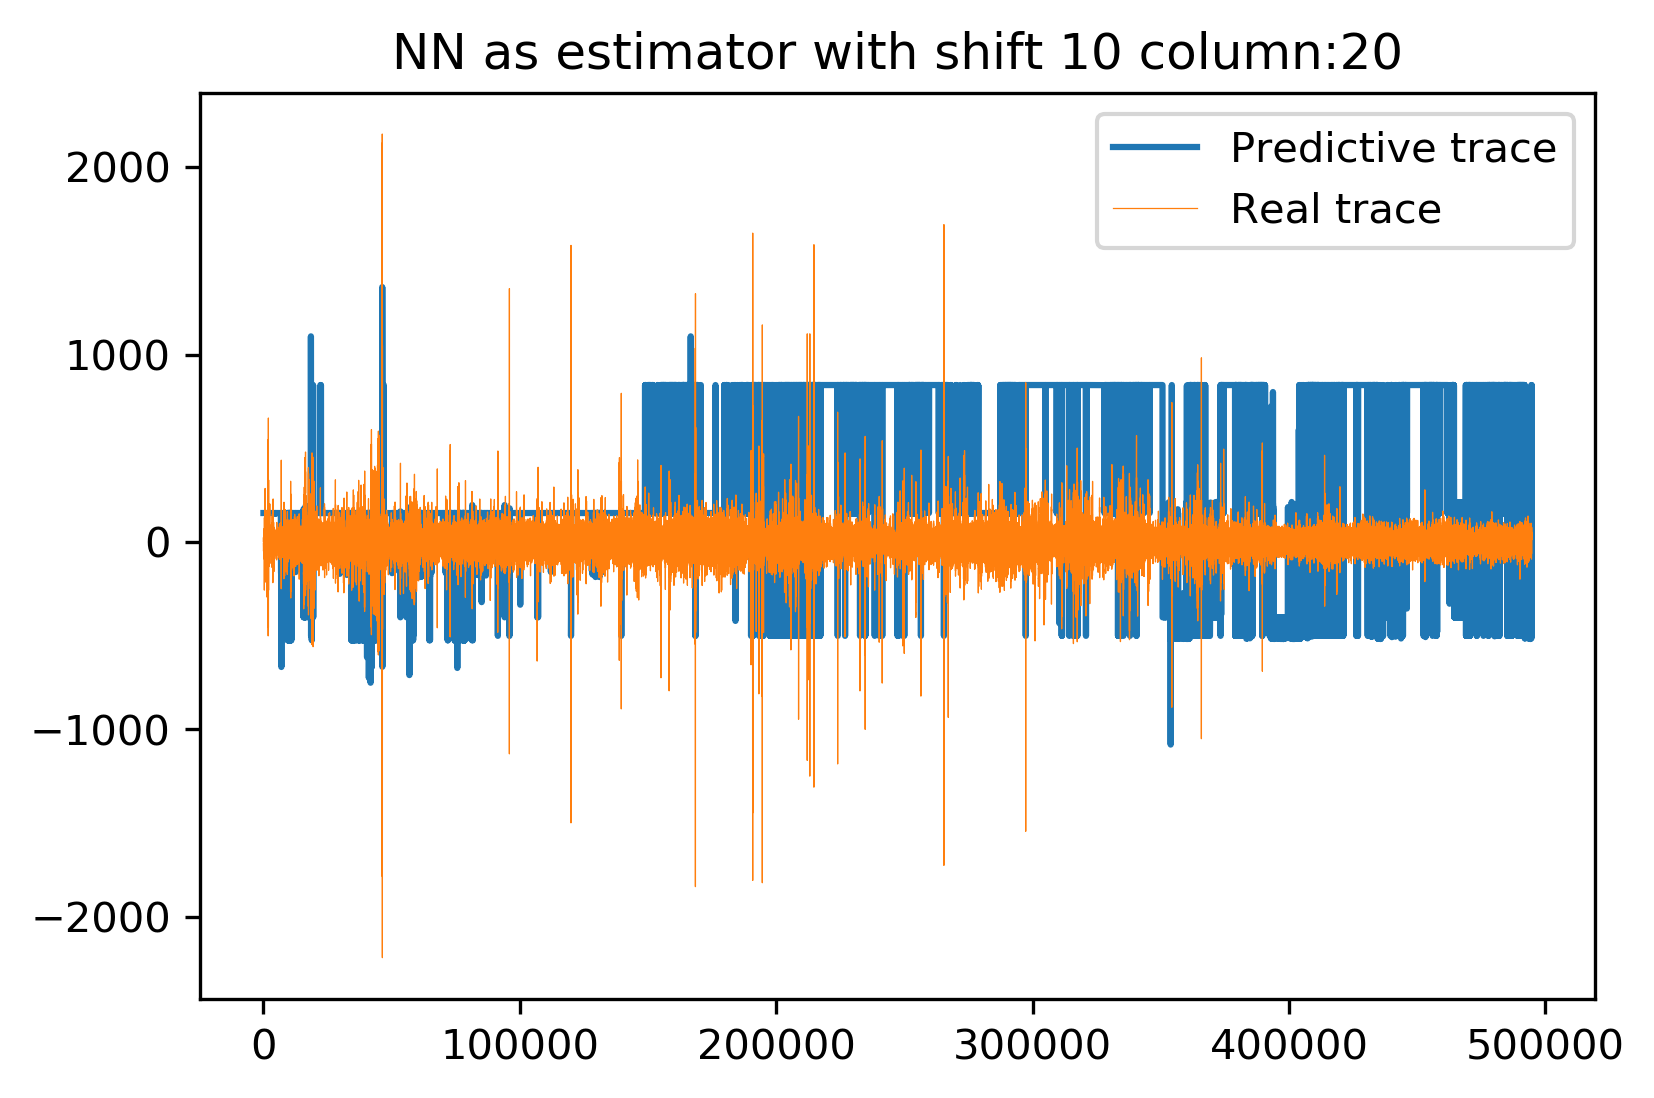

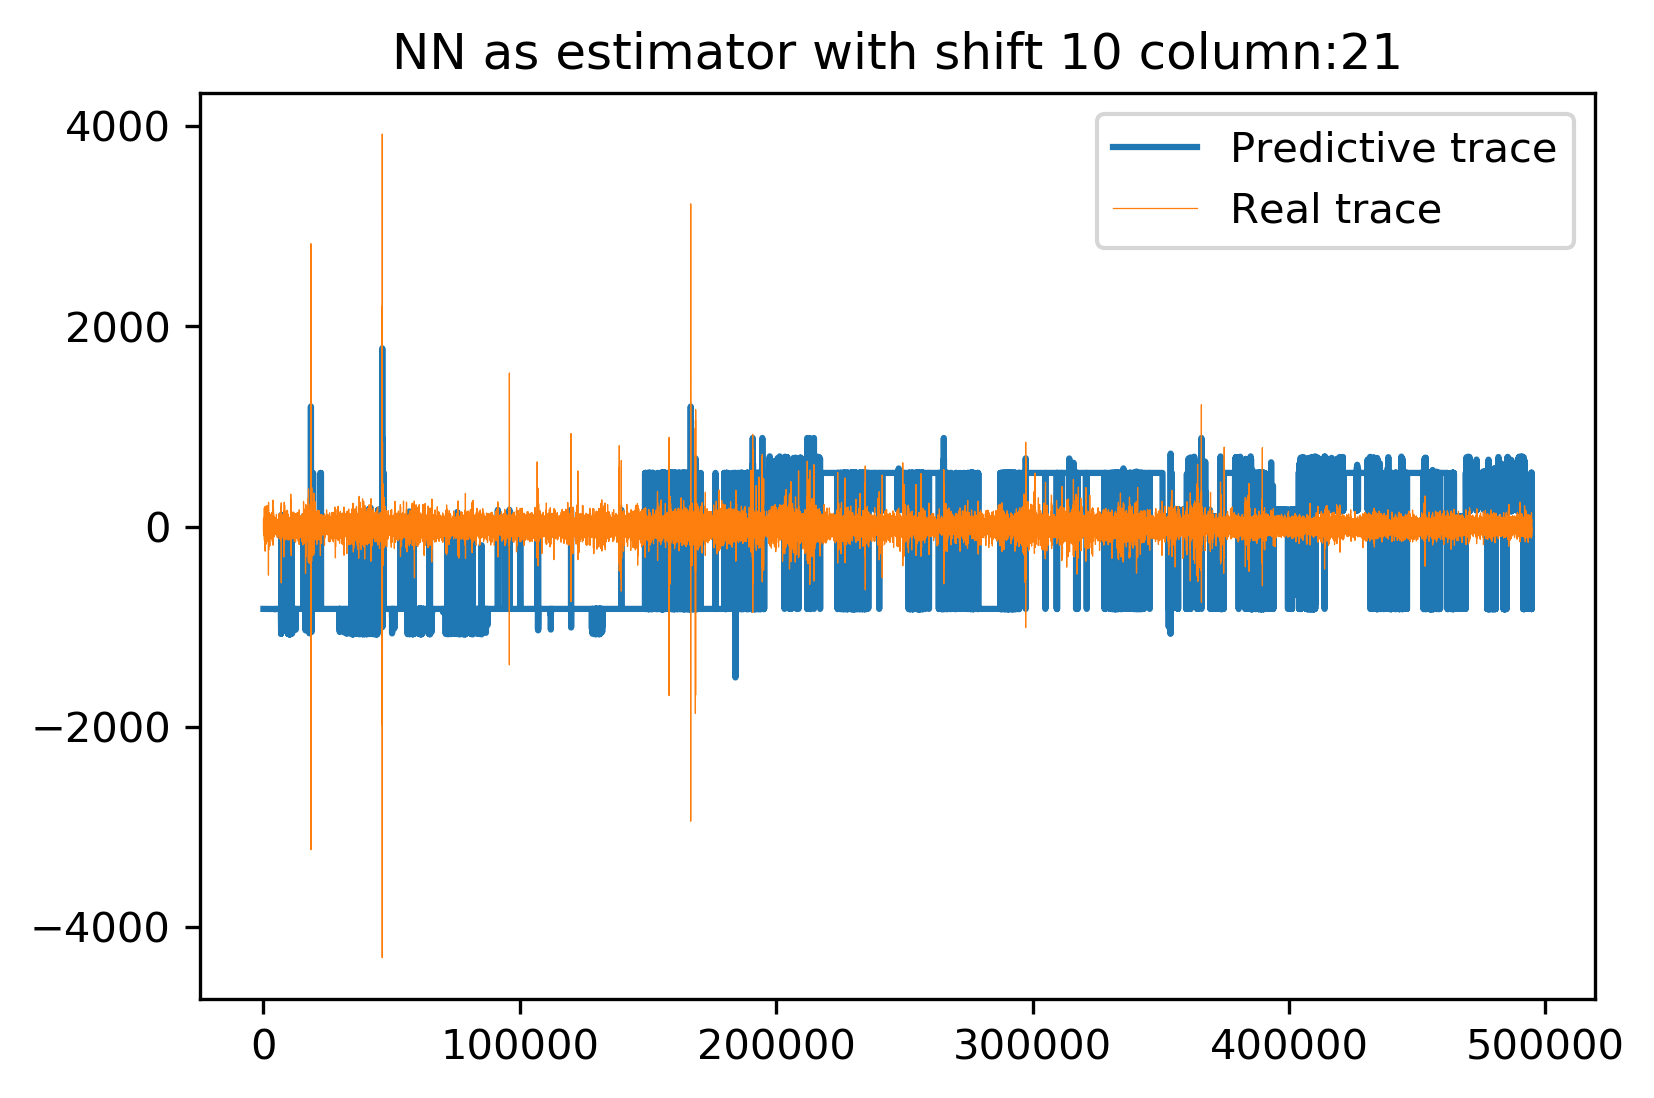

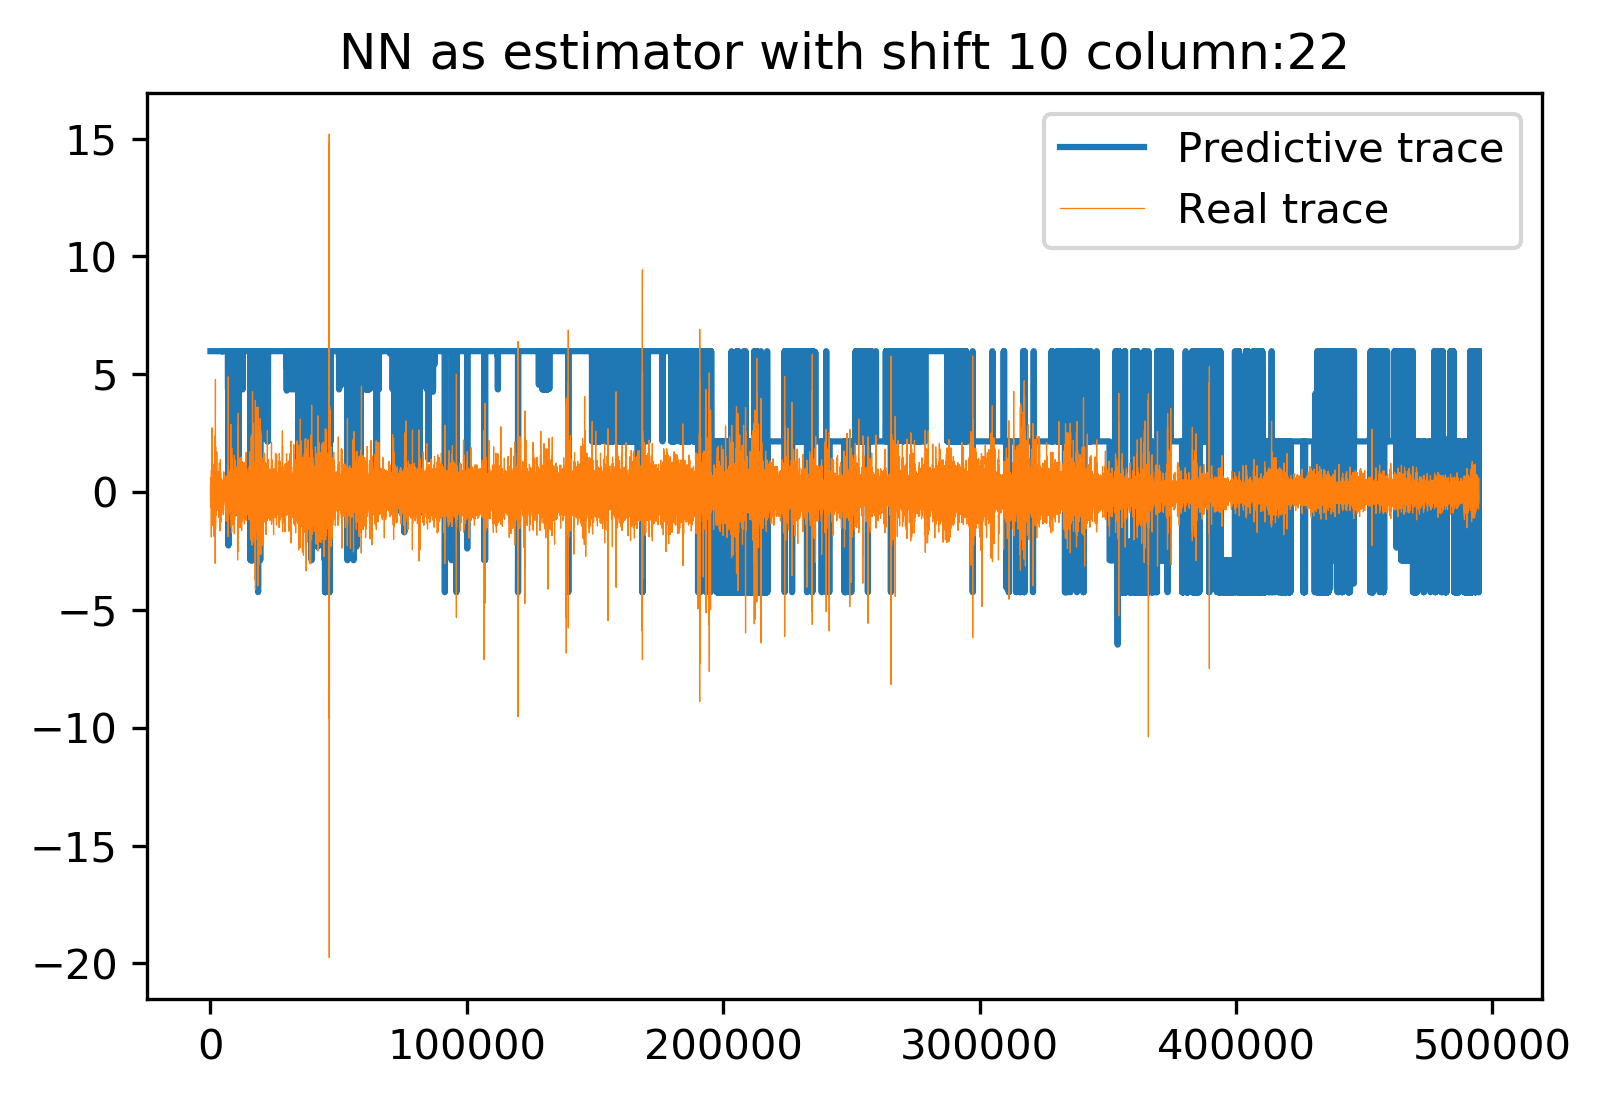

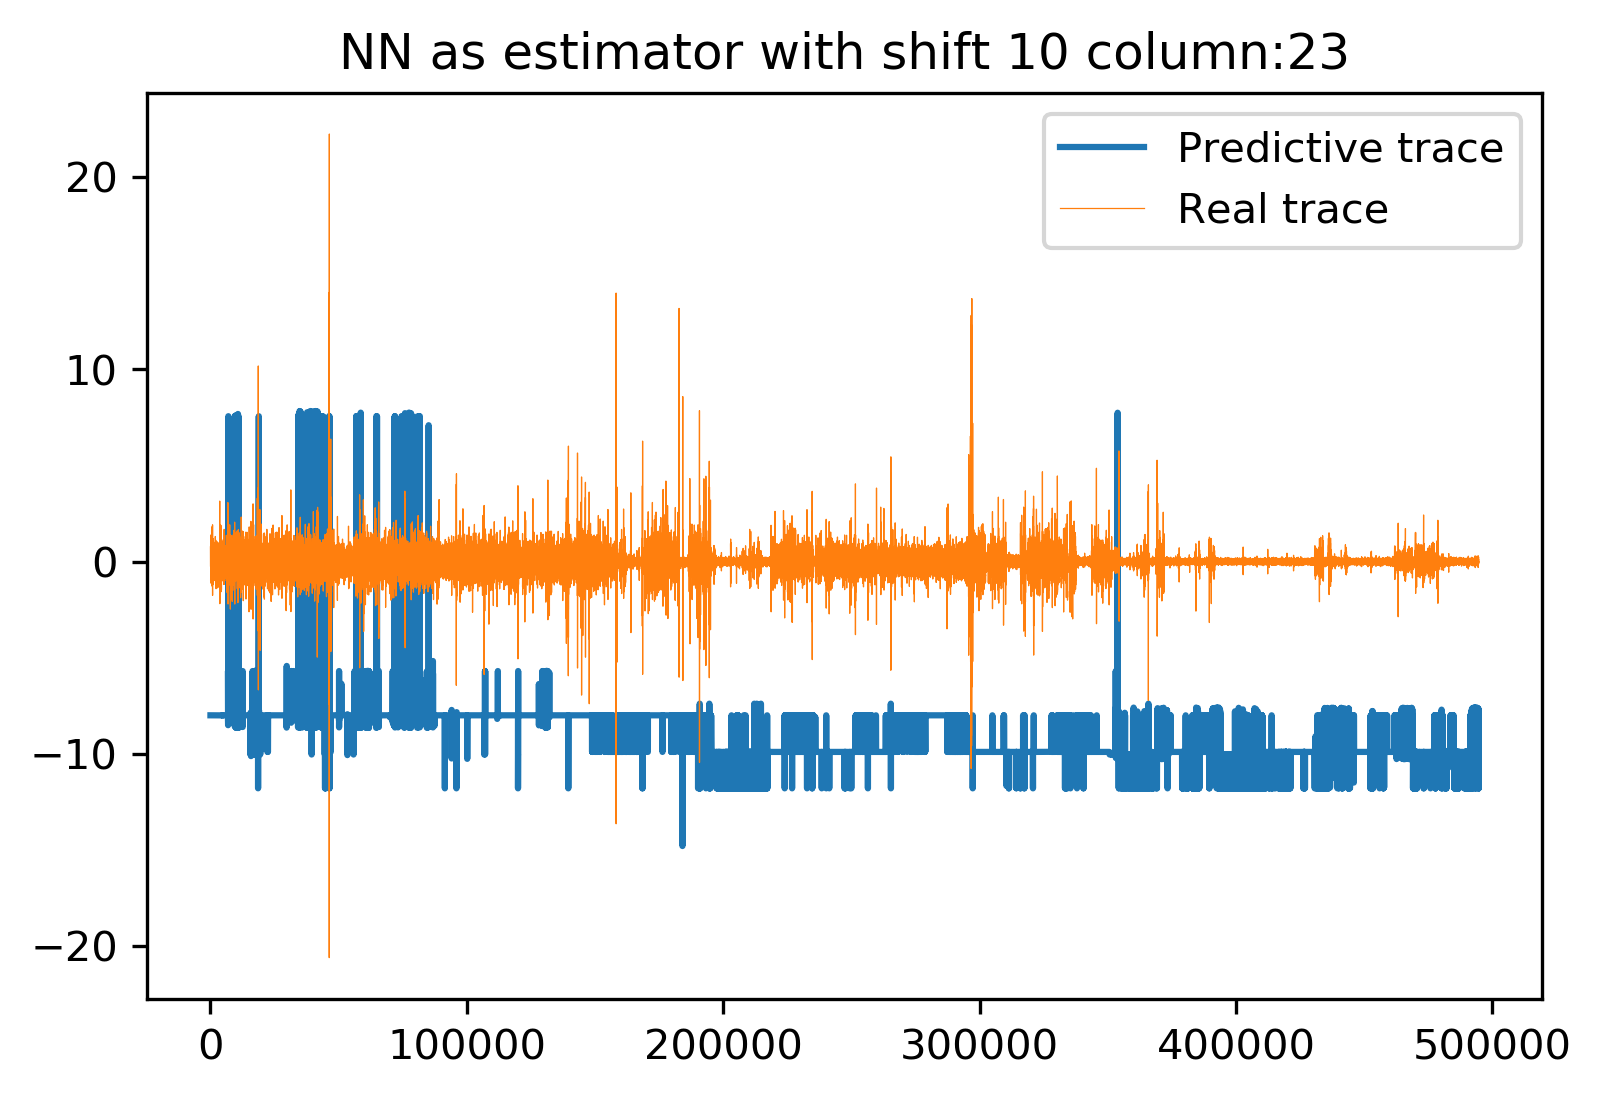

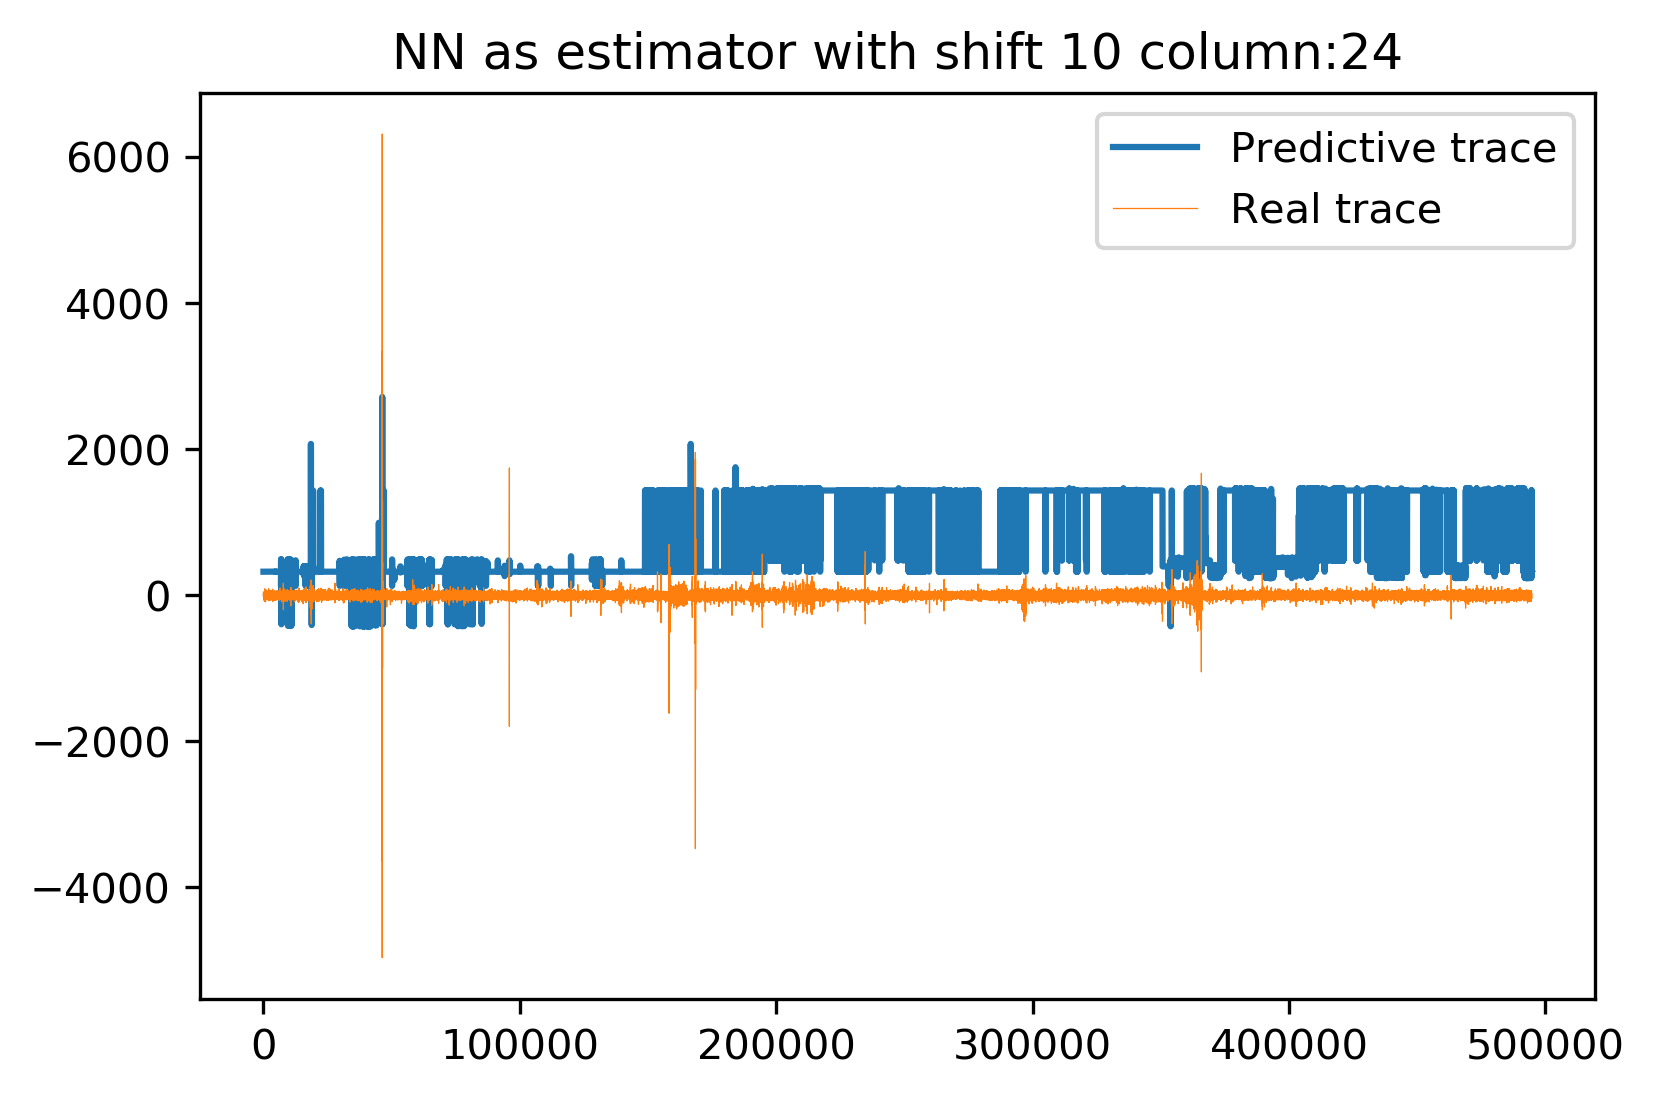

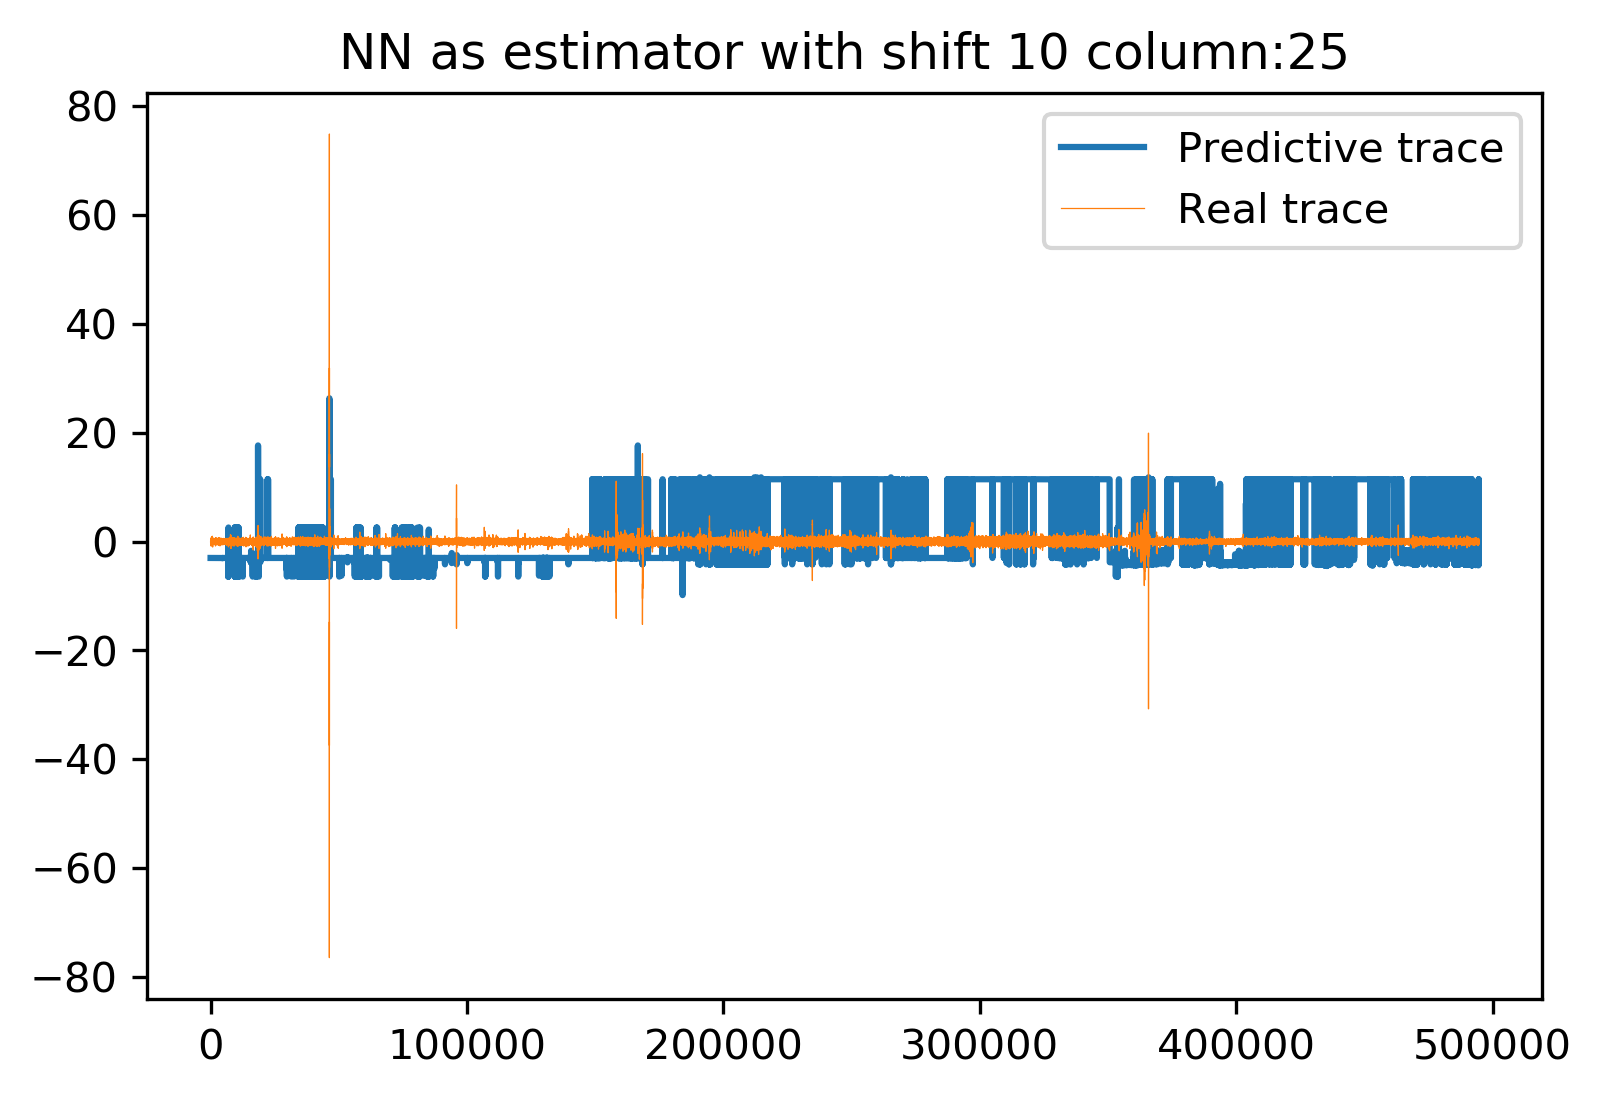

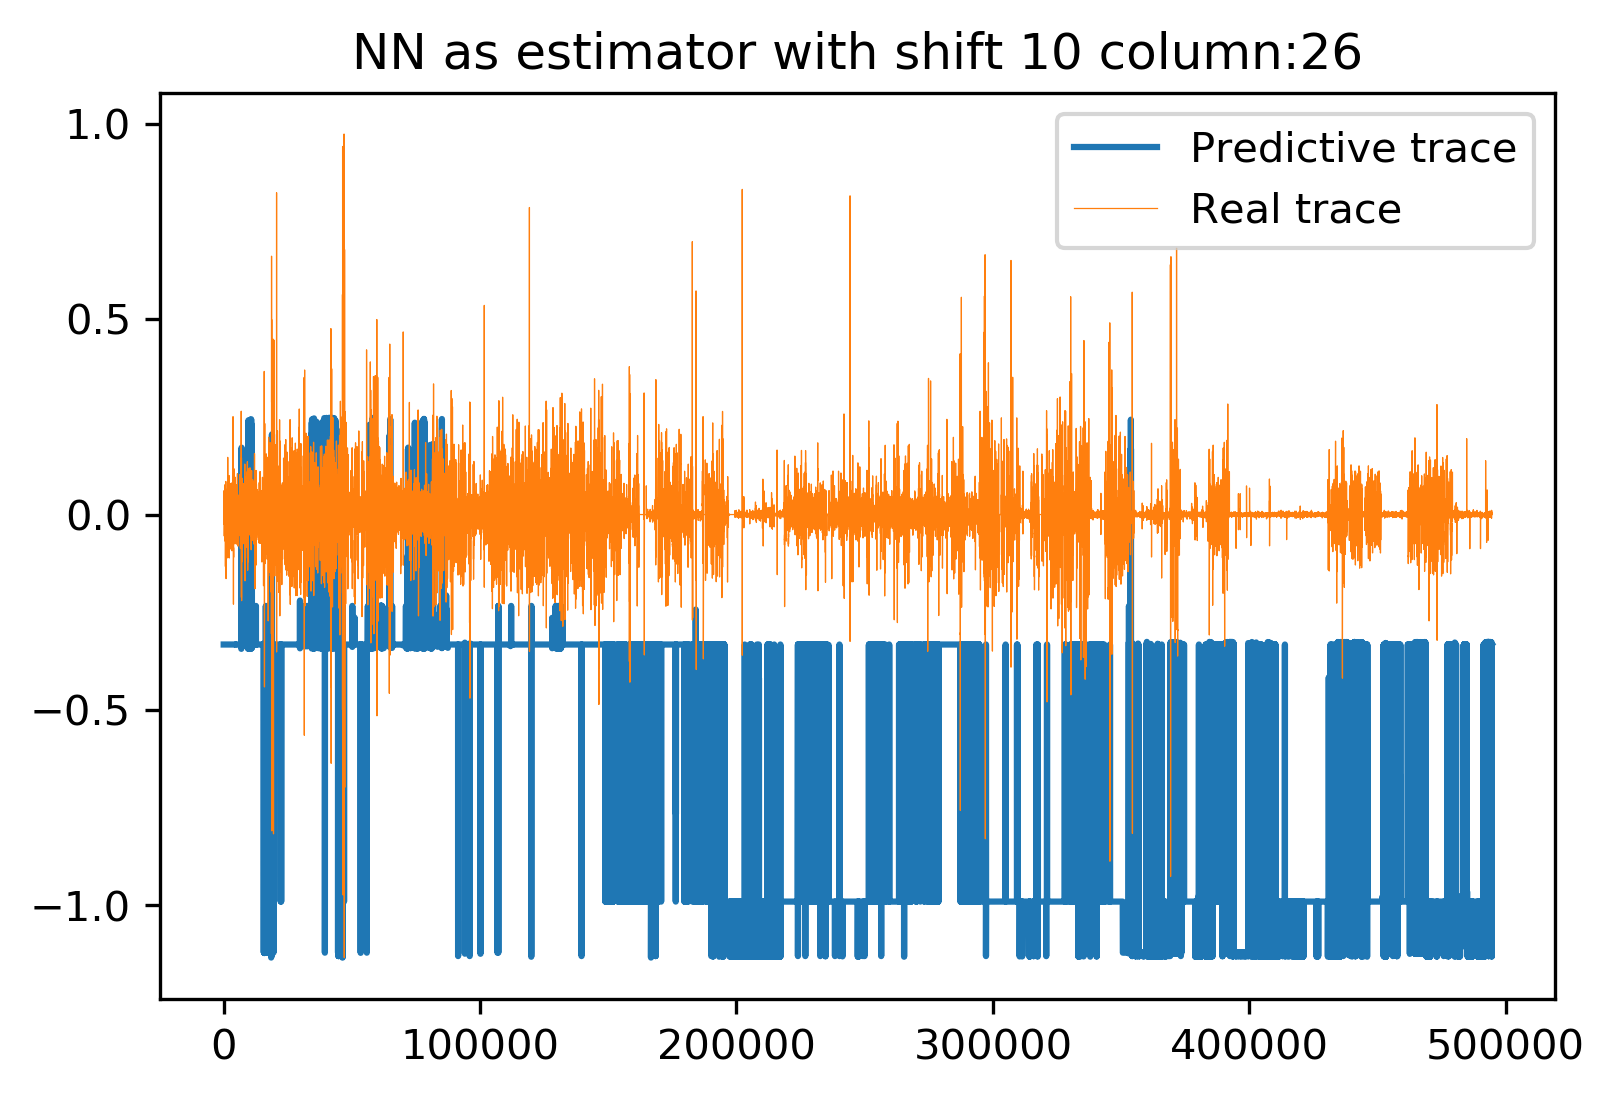

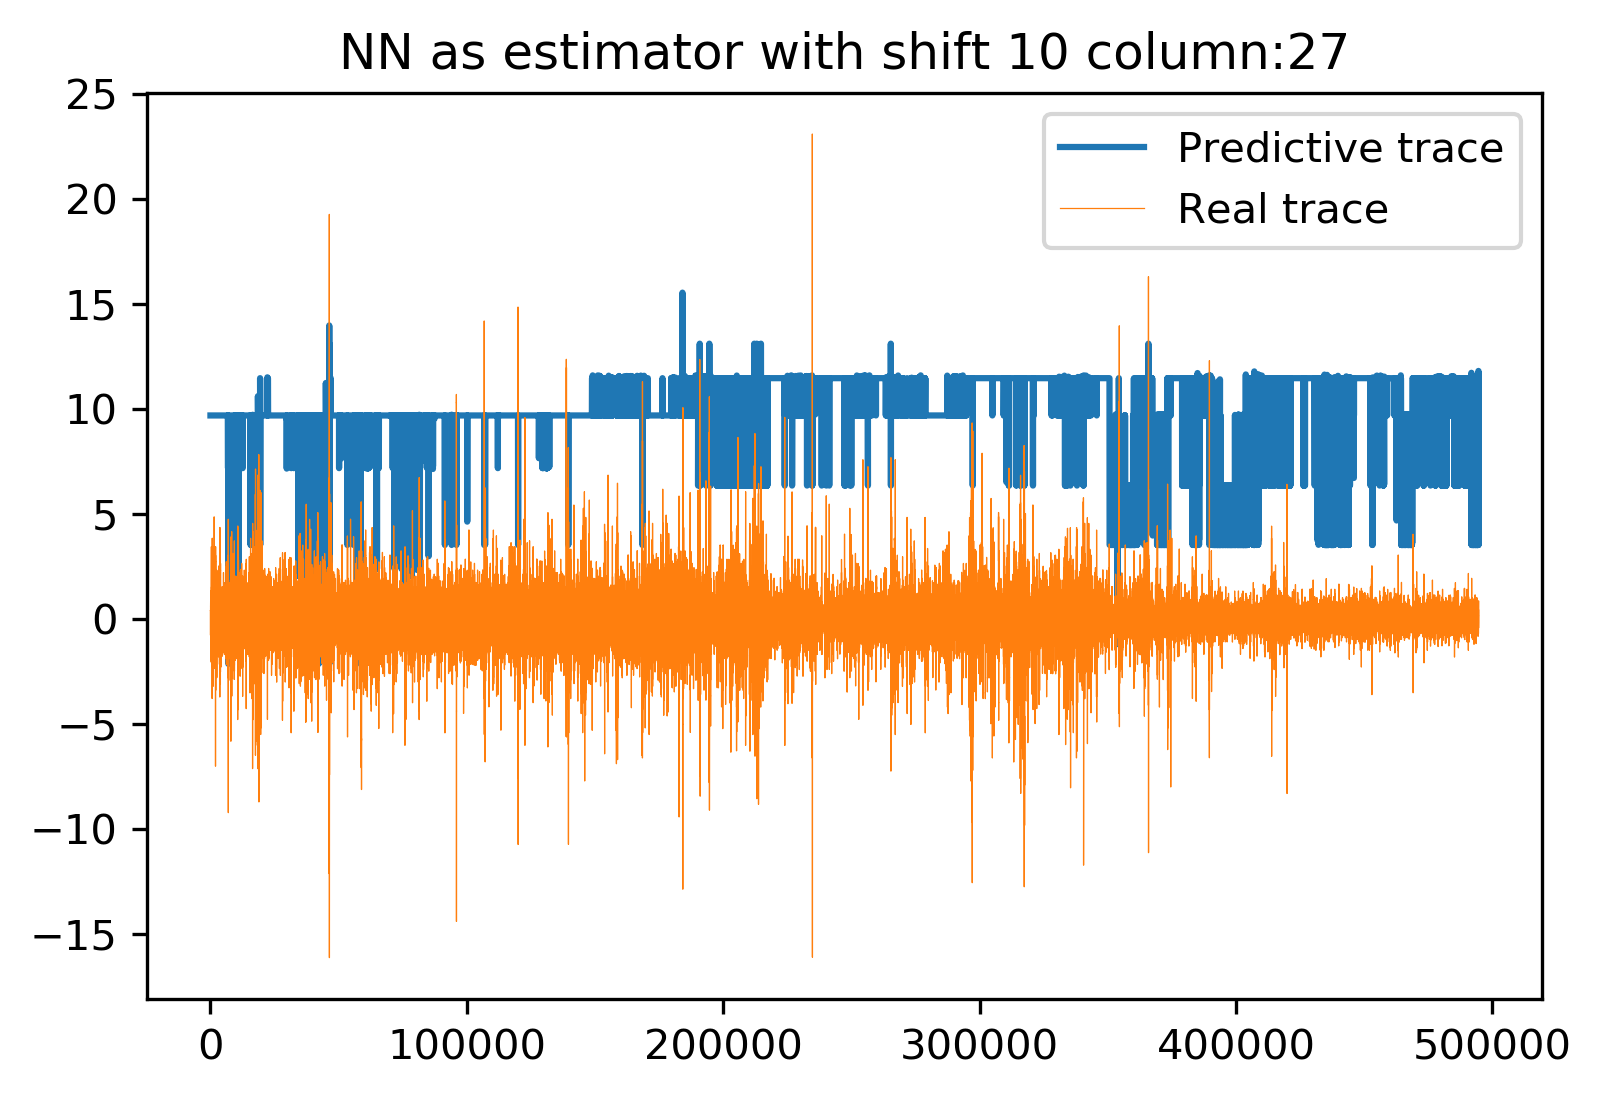

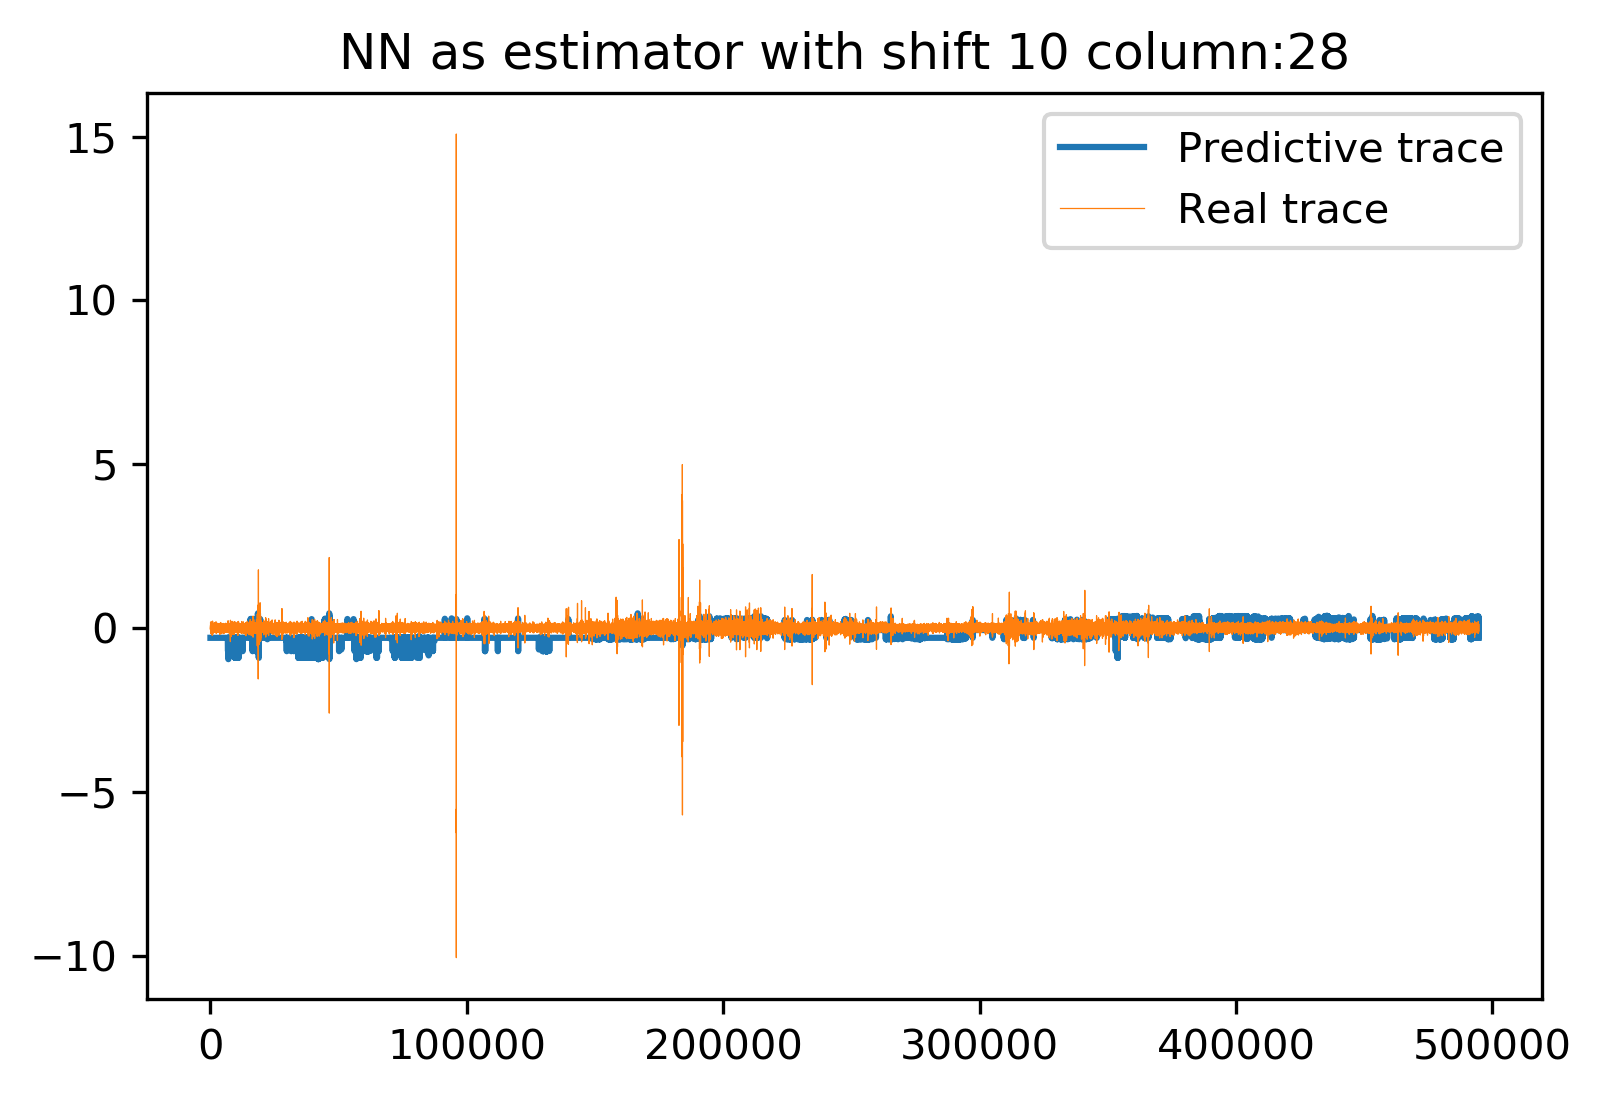

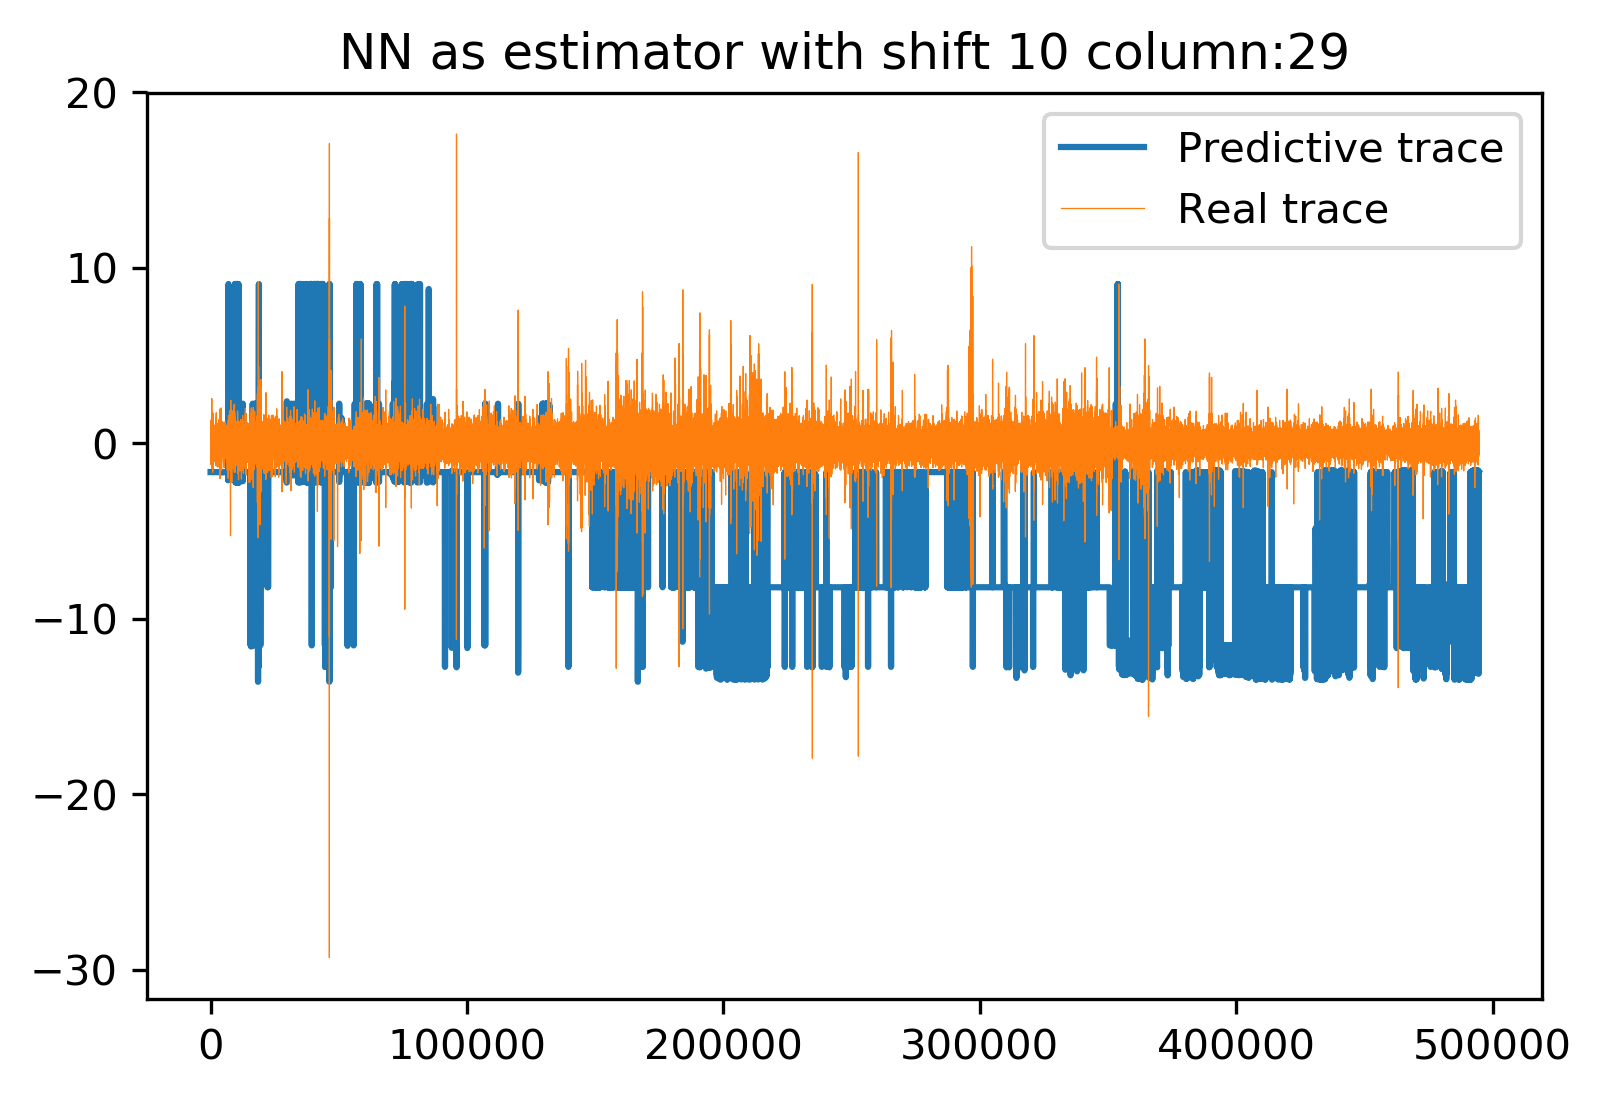

In [25]:
plot_all_traces(predictor_trace=output_estimation,
                real_trace=output_training,
                title="NN as estimator with shift 10")

# Estimation of Heavy Naphta

The Heavy Naphta production correspond 

- Tag: 14FRC501 | Heavy Naphtha from C1452 | High | Int | \\piserver\14FRC501.MEAS

In [26]:
#variable you want to check
variable_name='14FRC501.MEAS'

In [27]:
column=np.where(state_names==variable_name)[0][0]
print(column)

21


In [41]:
#Select parameters of the plot
ini_obs=3*10**3
num_obs=80
all_range=False
all_range=True
if all_range:
    ini_obs=0
    num_obs=494624
state=state_names[column] #should be same of variable name above
print(state)

14FRC501.MEAS


## NN Heavy Naphta

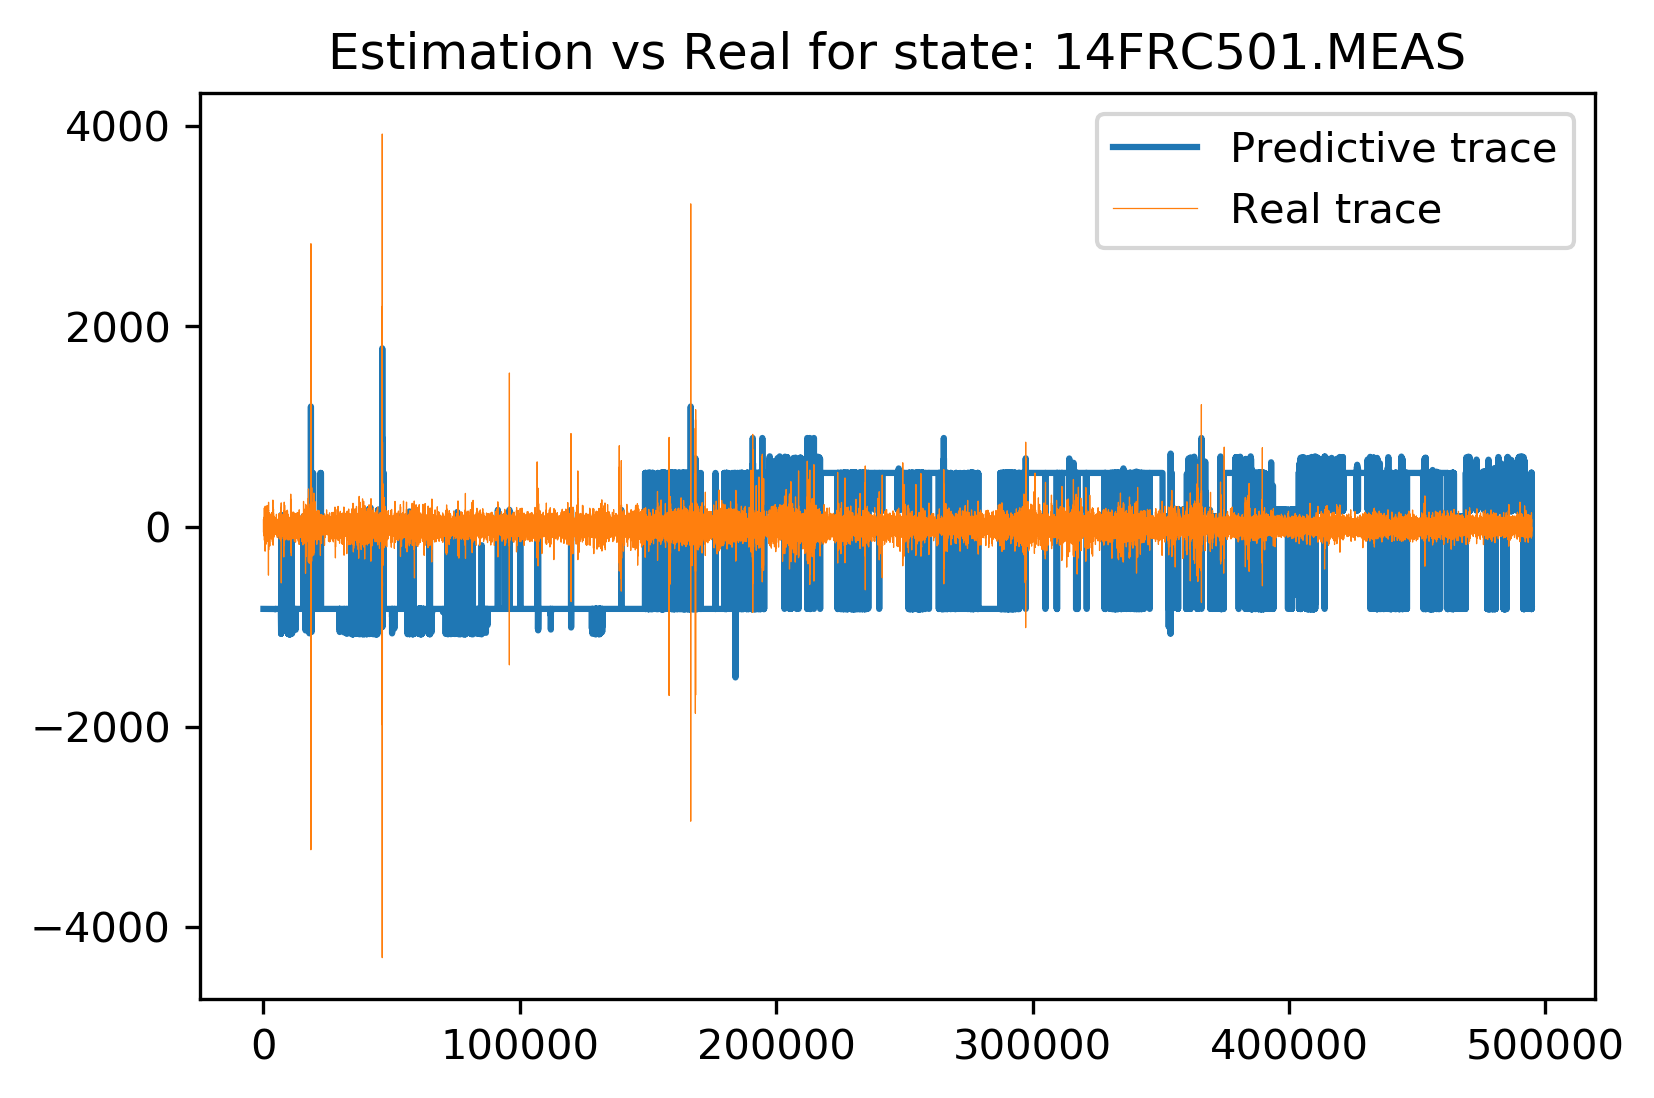

In [42]:
plot_title=('Estimation vs Real for state: %s'%state)
plot_results(estimate_trace=output_estimation[ini_obs:ini_obs+num_obs,column],
             real_trace=output_training[ini_obs:ini_obs+num_obs,column],
             title=plot_title)

In [30]:
input_training.shape

(494614, 38)

In [31]:
output_training.shape

(494614, 30)

In [32]:
s0=input_training[0,:]

In [33]:
s9=input_training[9,:]

In [34]:
d1=s9-s0

In [35]:
output_training[0,:]

array([-3.9119141e+01,  4.8913570e-01,  1.5145880e-01, -2.9258730e-03,
       -3.2799073e+00, -7.5487140e-02, -1.8003850e-01, -2.4430840e-01,
       -1.4876425e-02,  1.3158203e+01,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00, -7.2357180e-02,  4.8332977e-01,
        3.0279541e-01, -1.4134717e+00,  1.6185761e-01, -4.2191000e-03,
        3.2042240e+00, -5.2677002e+01,  3.2583620e-01,  7.6524353e-01,
        2.2220703e+01, -4.2663600e-02,  5.5740982e-02,  3.9672851e-01,
       -1.3975620e-02,  4.4519043e-01])

In [36]:
d1

array([-2.60152590e+01,  4.91950000e-02,  1.31225000e-02, -5.18800000e-04,
       -2.70593260e+01,  2.71875000e+00, -7.67421700e-03, -4.10080000e-04,
        5.04184570e+01, -4.22729490e+00,  2.41851800e-01, -9.87625100e-03,
       -4.88848880e+00,  7.91740000e-03, -4.87625100e-01, -1.35162300e-01,
       -1.75276400e-02, -3.27050800e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -3.11431900e-02, -2.10572000e-03,
       -2.54222870e-01, -1.58540726e+00,  2.14462300e-02,  3.29513000e-02,
        1.57786870e+01, -4.81130370e+01,  2.27806100e-01,  6.68350220e-01,
        2.07045900e+01, -3.02536000e-01,  4.92516450e-02,  3.91311640e-01,
       -7.03835500e-03,  4.57515720e-01])

In [44]:
get_stats(output_training)

/nGeneral Stadistics

max accuracy:6825.406310899998
min accuracy:-6335.214805118
average accuracy:-0.0017574771785308031
standard desviation:25.23587910594809



(6825.406310899998, -6335.214805118, -0.0017574771785308031, 25.23587910594809)

14FRC501.MEAS


Text(0.5, 1.0, 'Heavy Naphta from data')

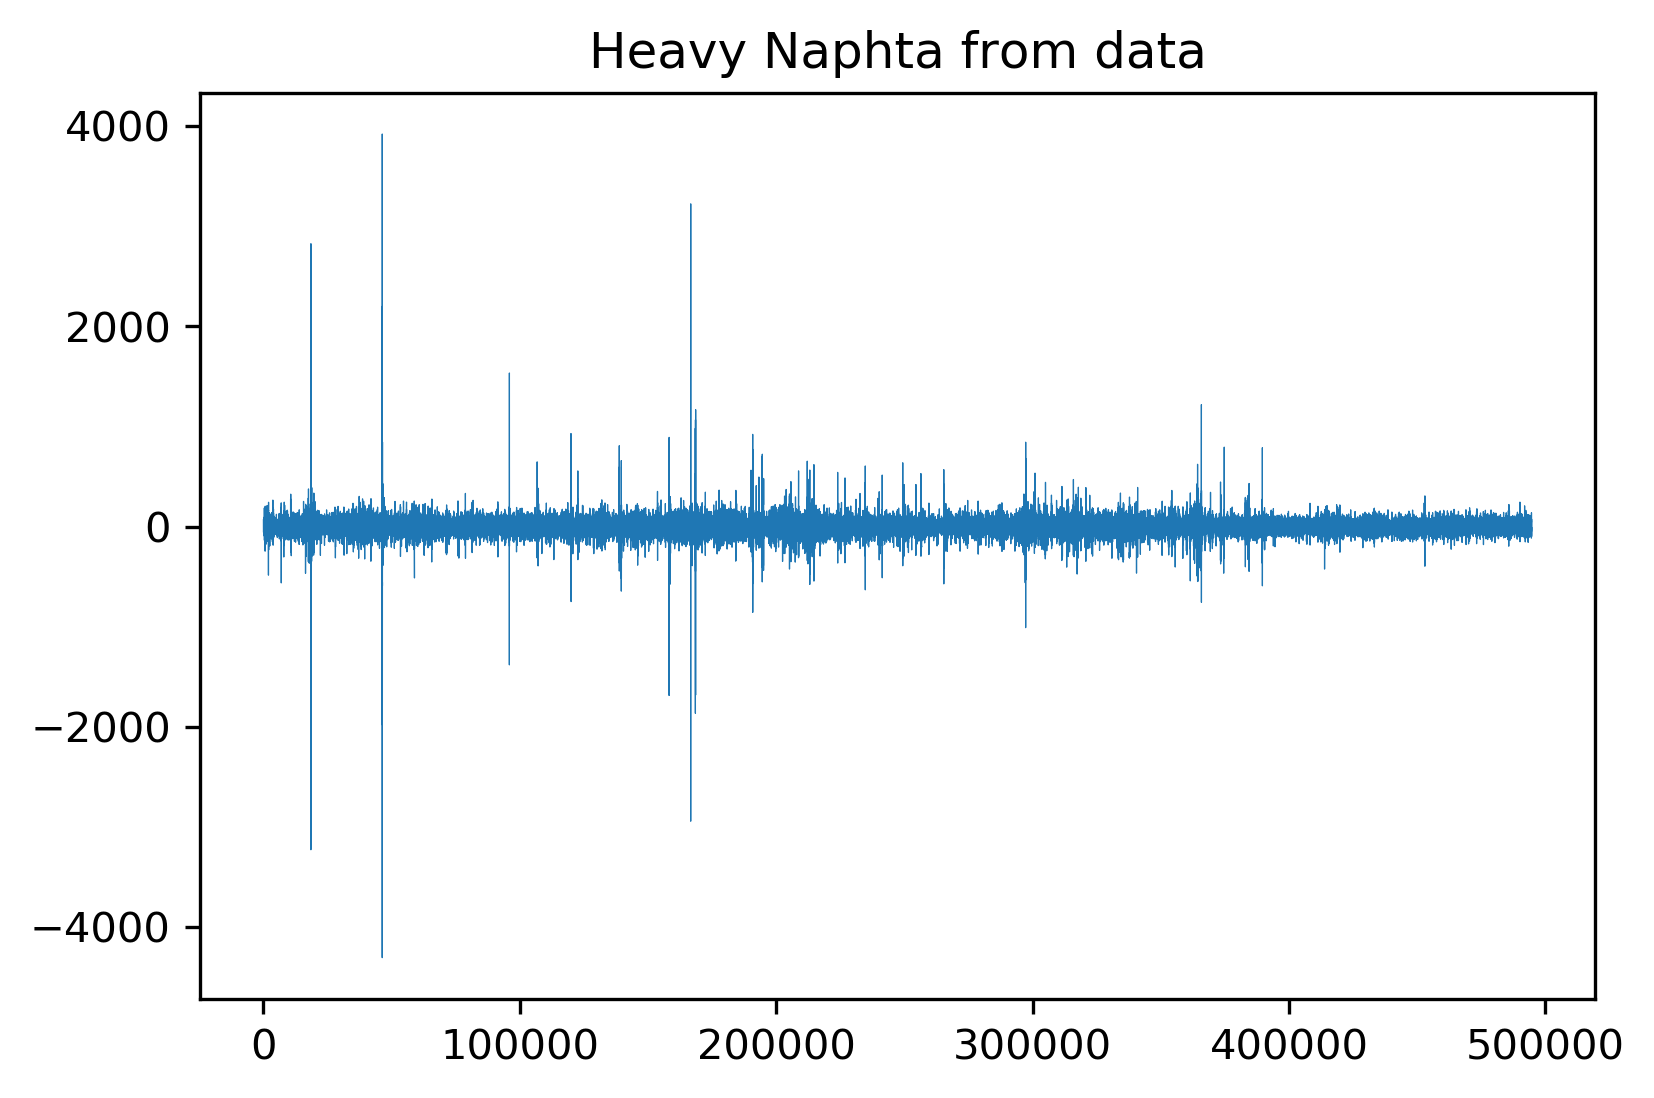

In [51]:
#Select parameters of the plot
ini_obs=3*10**3
num_obs=10000
all_range=False
all_range=True
if all_range:
    ini_obs=0
    num_obs=494624
state=state_names[column] #should be same of variable name above
print(state)

Text(0.5, 1.0, 'Heavy Naphta from data')

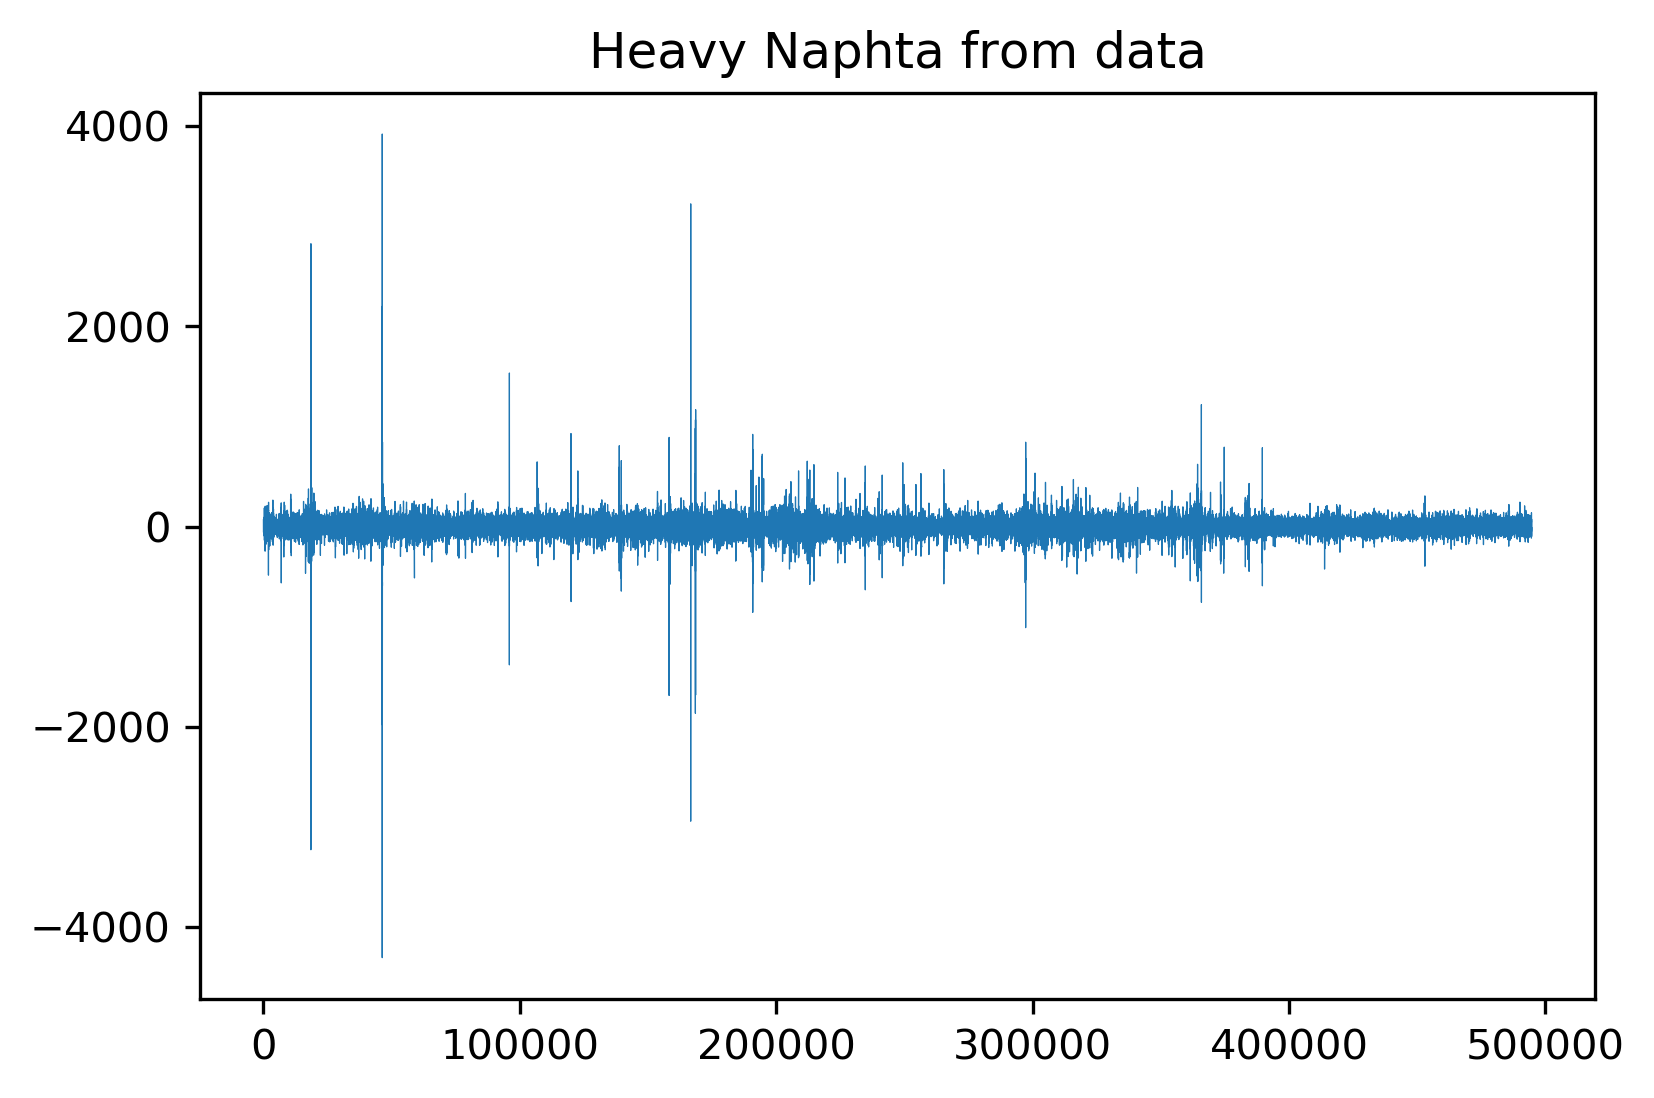

In [52]:
#Plot data
plt.plot(output_training[ini_obs:ini_obs+num_obs,column],label='Real trace',linewidth=0.3)
plt.title('Heavy Naphta from data')

Text(0.5, 1.0, 'Heavy Naphta from estimation')

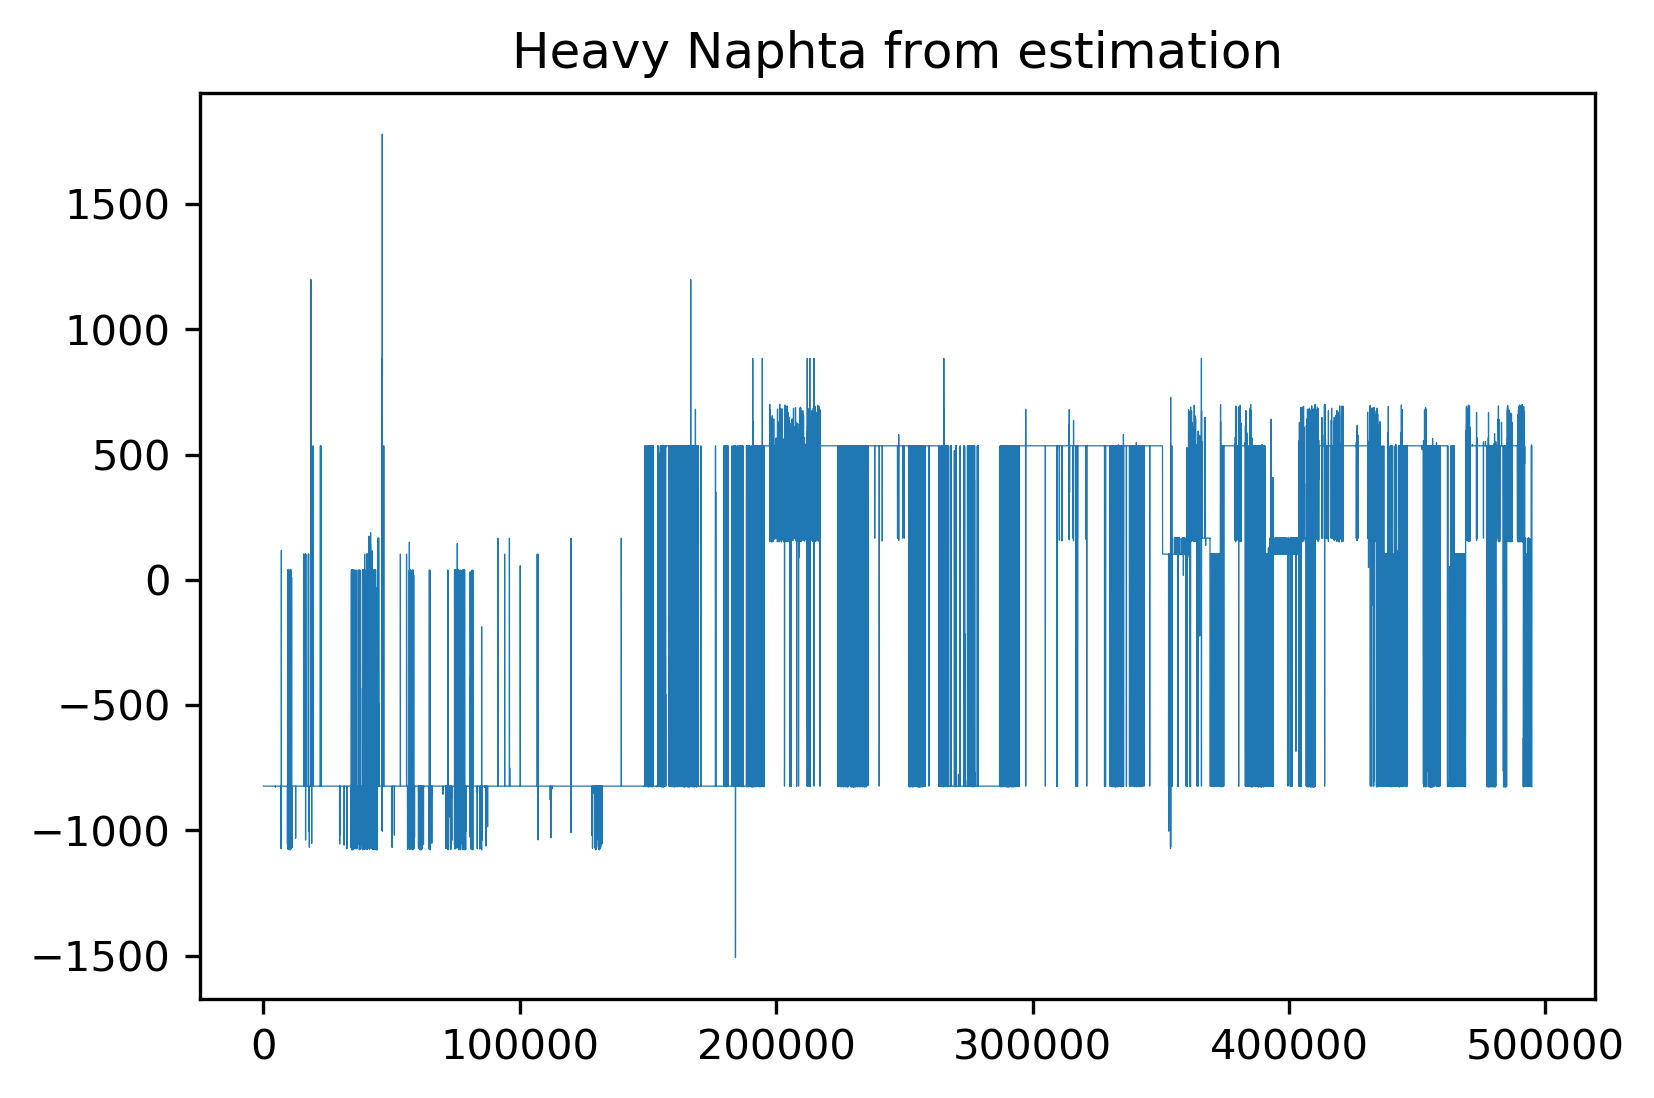

In [54]:
#Plot prediction
plt.plot(output_estimation[ini_obs:ini_obs+num_obs,column],label='Real trace',linewidth=0.3)
plt.title('Heavy Naphta from estimation')